# Fundamentals of Data Analytics.
# Flight Price Prediction Project



This Jupiter Notebook presents the contributors approach to predict flight prices using a dataset from Kaggle, which can be found here : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction . This dataset is the result of web scraping the booking website "Ease My Trip" and includes information about the price and characteristics of flights between various Indian cities in 2022.


### Contributors:
* Juan Camilo Restrepo 
* Jennifer Artunian 
* Yash Maniar 




## Data Cleaning and Exploration

We decided to take on the challenge of cleaning the data ourselves, rather than using a pre-cleaned dataset. This allowed us to gain a deeper understanding of the data and ensure it was prepared to our exact specifications. We then performed an exploratory data analysis to understand the factors affecting the price of the tickets.

## Model Building

We built predictive models using various techniques. Our primary approach was to use multilinear models with both One Hot Encoding and Label Encoding. We also performed a multicollinearity analysis to refine our models. As an alternative, we employed a Random Forest model.

## Classification Techniques

In addition to regression models, we also explored classification techniques. We used a Single Tree Classifier, Random Forest Classifiers, and conducted a Clustering Analysis.

Our project demonstrates a comprehensive approach to data science, from data cleaning and exploration to building and refining predictive models. We hope that our work can provide valuable insights into the factors affecting flight prices.

## Data Cleaning

### Importing all the libraries

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

 Import the data from the Business table

In [23]:
# import csv data from business data
businessDf = pd.read_csv("business.csv")
businessDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


Check for missing values in the business Data Set :

In [24]:
#Check for missing values
businessDf.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

### importing data from Economy dataset 

In [25]:
economyDf = pd.read_csv("economy.csv")
economyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


Check for missing values in the Economy Data Set:

In [26]:
## check for missing Values:
economyDf.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [27]:
# Departure cities in Economy and Business classes
print(economyDf["from"].unique())
print(businessDf["from"].unique())
print(businessDf["from"].unique().size)

['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
6


In [28]:
# Shape of both Distributions
print(economyDf.shape)
businessDf.shape

(206774, 11)


(93487, 11)

In [29]:
# Add tag to identify the type of flight to each of the 2 Data frames
economyDf['flight_class'] = "Economy"
businessDf['flight_class'] = "Business"


 Create a Merged Data Set, using both economy and business data sets:

In [30]:
mergedDf =pd.concat([economyDf,businessDf],axis=0, ignore_index=True)

### Merged Dataset

In [31]:
mergedDf.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,flight_class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [32]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          300261 non-null  object
 1   airline       300261 non-null  object
 2   ch_code       300261 non-null  object
 3   num_code      300261 non-null  int64 
 4   dep_time      300261 non-null  object
 5   from          300261 non-null  object
 6   time_taken    300261 non-null  object
 7   stop          300261 non-null  object
 8   arr_time      300261 non-null  object
 9   to            300261 non-null  object
 10  price         300261 non-null  object
 11  flight_class  300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


In [33]:
Clean = pd.read_csv("Clean_Dataset.csv")
Clean.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,to_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Looking for problematic data

In [34]:
for index in mergedDf.columns:
    print(f"{index} values ({mergedDf[index].unique().size}) : {mergedDf[index].unique()}")


date values (49) : ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']
airline values (8) : ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
ch_code values (8) : ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']
num_code values (1255) : [8709 8157  764 ... 7127 7259  433]
dep_time values (251) : ['18:55' '06:20' '04:25' '10:20' '08:50' '11:40' '09:30' '14:20' '08:00'
 '15:0

From the previous output analysis, it is clear that the columns 'Stop' and 'time taken' will need to be cleaned

**Cleaning Stop Column**

In [35]:
mergedDf['stop']= mergedDf['stop'].astype(str)
mergedDf['stop'] = mergedDf['stop'].str.replace('\t','')
mergedDf['stop'] = mergedDf['stop'].str.replace('\n','')
mergedDf['stop'].unique()

array(['non-stop ', '1-stop', '1-stopVia IXU', '1-stopVia Chennai',
       '1-stopVia Indore', '1-stopVia RPR', '2+-stop',
       '1-stopVia Lucknow', '1-stopVia GOP', '1-stopVia Raipur',
       '1-stopVia Nagpur', '1-stopVia Surat', '1-stopVia Hyderabad',
       '1-stopVia STV', '1-stopVia IDR', '1-stopVia VTZ',
       '1-stopVia Guwahati', '1-stopVia NAG', '1-stopVia Vishakhapatnam',
       '1-stopVia NDC', '1-stopVia IXE', '1-stopVia Patna',
       '1-stopVia PAT', '1-stopVia Mangalore', '1-stopVia Mumbai',
       '1-stopVia KLH', '1-stopVia MYQ', '1-stopVia Kolkata',
       '1-stopVia Delhi', '1-stopVia Kolhapur', '1-stopVia JRG',
       '1-stopVia Bhubaneswar', '1-stopVia Ranchi', '1-stopVia IXR',
       '1-stopVia JGB', '1-stopVia BBI', '1-stopVia Mysore',
       '1-stopVia GAY', '1-stopVia GAU', '1-stopVia HYD'], dtype=object)

Unique stop values containing '1-stop'

In [36]:
mergedDf[mergedDf['stop'].str.contains('1-stop')]['stop'].unique().size


38

Replacing all the '1-stop' values for 'One'

In [37]:
mergedDf.loc[mergedDf['stop'].str.contains('1-stop'),'stop']='One'
mergedDf['stop'].unique()

array(['non-stop ', 'One', '2+-stop'], dtype=object)

Replacing 'non-stop ' and '2+- stop'

In [38]:
mergedDf['stop']= mergedDf['stop'].str.replace('non-stop ','Zero')
mergedDf['stop']= mergedDf['stop'].str.replace('2+-stop','Two_or_more',)
mergedDf['stop'].unique()

array(['Zero', 'One', 'Two_or_more'], dtype=object)

**Current DataFrame**

In [39]:
mergedDf

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,flight_class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,Zero,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,Zero,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,Zero,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,Zero,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,Zero,11:10,Mumbai,"5,955",Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,One,19:50,Hyderabad,"69,265",Business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,One,22:55,Hyderabad,"77,105",Business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,One,20:55,Hyderabad,"79,099",Business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,One,17:00,Hyderabad,"81,585",Business


 Merging columns 'ch_code' and 'num_code' and dropping the original columns

In [40]:
mergedDf['flight_code'] = mergedDf['ch_code']+'-'+mergedDf['num_code'].astype(str)
mergedDf.drop(['ch_code','num_code'], axis=1, inplace=True)

In [41]:
###Checking data type on MergedDF
mergedDf['date']

0         11-02-2022
1         11-02-2022
2         11-02-2022
3         11-02-2022
4         11-02-2022
             ...    
300256    31-03-2022
300257    31-03-2022
300258    31-03-2022
300259    31-03-2022
300260    31-03-2022
Name: date, Length: 300261, dtype: object

### Getting the days left for the flight
To get the days left for the flight, we first convert the data column to datetime values, then we will use this to calculate the difference in days between the date of the data extraction and the date of the flight

### Convert date column to a datetime 

In [42]:
mergedDf['date'] = pd.to_datetime(mergedDf['date'],dayfirst=True)

### Calculating days left to departure

In [43]:
## Booking date assumed to be the day before the first date
booking_date =pd.to_datetime('2022-02-10')
mergedDf['days_left'] = mergedDf['date'] - booking_date 


Convert Days Left from Time Delta to integers

In [44]:
mergedDf['days_left']= mergedDf['days_left'].dt.days

### Creating a category to departure Time and Arrival time

In [45]:
# Extracting hour from 'dep_time' and 'arr_time"
mergedDf['hour_dep'] = mergedDf['dep_time'].str.split(':').str[0].astype(int)
mergedDf['hour_arr'] = mergedDf['arr_time'].str.split(':').str[0].astype(int)
# Categorize flights based on hour into 6 categories
def categorize_time_slot(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 18:
        return 'Evening'
    else:
        return 'Night'

# Applying the categorization to create a new 'time_slot' column
mergedDf['dep_time_category'] = mergedDf['hour_dep'].apply(categorize_time_slot)
mergedDf['arr_time_category'] = mergedDf['hour_arr'].apply(categorize_time_slot)
# Drop the intermediate 'hour' column 
mergedDf.drop(['hour_arr', 'hour_dep'], axis=1, inplace=True)


# Check the new Column
mergedDf['dep_time_category'].head(5)


0            Night
1          Morning
2    Early Morning
3     Late Morning
4          Morning
Name: dep_time_category, dtype: object

In [46]:
## Check the Output
mergedDf.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,Zero,21:05,Mumbai,"5,953",Economy,SG-8709,1,Night,Night
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,Zero,08:40,Mumbai,"5,953",Economy,SG-8157,1,Morning,Morning
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,Zero,06:35,Mumbai,"5,956",Economy,I5-764,1,Early Morning,Morning
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,Zero,12:35,Mumbai,"5,955",Economy,UK-995,1,Late Morning,Afternoon
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,Zero,11:10,Mumbai,"5,955",Economy,UK-963,1,Morning,Late Morning


### Converting the price from string to an integer value

In [47]:
mergedDf['price'] = mergedDf['price'].str.replace(',', '').astype(int)

In [48]:
mergedDf['price'].dtypes

dtype('int32')

In [49]:
mergedDf.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning


### Converting 'time_taken' values to Minutes as an Integer:

Splitting the data in hours and minutes 

Getting the hours and checking for inconsistent format

In [50]:

mergedDf['hours_taken'] = mergedDf['time_taken'].str.split('h ').str[0]
mergedDf['hours_taken'].unique()
# Check for problematic data


array(['02', '12', '16', '11', '14', '15', '03', '05', '08', '06', '18',
       '23', '24', '04', '19', '22', '26', '17', '20', '21', '07', '10',
       '28', '09', '13', '29', '27', '30', '25', '31', '33', '36', '35',
       '34', '39', '01', '37', '40', '32', '7', '41', '38', '1.03',
       '1.02', '2', '00', '47', '1.01', '5', '42', '49', '45', '44'],
      dtype=object)

Removing Inconsistent formatted Data

In [51]:

mergedDf[(mergedDf['hours_taken']== '1.03' ) | (mergedDf['hours_taken']== '1.02') | ( mergedDf['hours_taken']== '1.01')] = '01'
mergedDf['hours_taken'] = mergedDf['hours_taken'].astype(int)
## check to see the result
mergedDf['hours_taken'].unique()

array([ 2, 12, 16, 11, 14, 15,  3,  5,  8,  6, 18, 23, 24,  4, 19, 22, 26,
       17, 20, 21,  7, 10, 28,  9, 13, 29, 27, 30, 25, 31, 33, 36, 35, 34,
       39,  1, 37, 40, 32, 41, 38,  0, 47, 42, 49, 45, 44])

Convert hours to minutes

In [52]:
# minutes in an hour
hour = int(60)
#calculate the amount of minutes
mergedDf['total_time'] = mergedDf['hours_taken']* hour
print(mergedDf['total_time'].max())
print(mergedDf['hours_taken'].max())


2940
49


Repeat the process with the minutes. Split the time taken, take the minutes:

In [53]:
mergedDf['minutes'] = mergedDf['time_taken'].str.split('h ').str[1]
mergedDf['minutes'].unique()

array(['10m', '20m', '15m', '05m', '45m', '30m', '40m', '50m', '00m',
       '25m', '35m', '55m', '04m', nan, '59m', '24m'], dtype=object)

Get rid of nan values

In [54]:
mergedDf['minutes'].replace(np.nan,'00',inplace=True)
mergedDf['minutes']= mergedDf['minutes'].str.split('m').str[0]
mergedDf['minutes'] = mergedDf['minutes'].astype(int)
mergedDf['flight_time']=mergedDf['minutes'] + mergedDf['total_time'] 
# Check the maximum flight time 
mergedDf['flight_time'].max()

2990

Current DataFrame

In [55]:
mergedDf.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category,hours_taken,total_time,minutes,flight_time
0,2022-02-11 00:00:00,SpiceJet,18:55,Delhi,02h 10m,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night,2,120,10,130
1,2022-02-11 00:00:00,SpiceJet,06:20,Delhi,02h 20m,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning,2,120,20,140
2,2022-02-11 00:00:00,AirAsia,04:25,Delhi,02h 10m,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning,2,120,10,130
3,2022-02-11 00:00:00,Vistara,10:20,Delhi,02h 15m,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon,2,120,15,135
4,2022-02-11 00:00:00,Vistara,08:50,Delhi,02h 20m,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning,2,120,20,140


Get rid of temporary columns

In [56]:
mergedDf.drop(['time_taken','hours_taken','total_time','minutes'],axis=1 ,inplace=True)


In [57]:
mergedDf.head()

,date,airline,dep_time,from,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category,flight_time
0,2022-02-11 00:00:00,SpiceJet,18:55,Delhi,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night,130
1,2022-02-11 00:00:00,SpiceJet,06:20,Delhi,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning,140
2,2022-02-11 00:00:00,AirAsia,04:25,Delhi,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning,130
3,2022-02-11 00:00:00,Vistara,10:20,Delhi,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon,135
4,2022-02-11 00:00:00,Vistara,08:50,Delhi,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning,140


Convert the departure time and arrival time to minutes from midnight, drop the rows that contain a different format

In [58]:
# Convert 'dep_time' and 'arr_time' to datetime objects with flexible format inference
mergedDf['dep_hours'] = pd.to_datetime(mergedDf['dep_time'], errors='coerce')
mergedDf['arr_hours'] = pd.to_datetime(mergedDf['arr_time'], errors='coerce')

# Drop rows with NaT (Not a Time) values
mergedDf = mergedDf.dropna(subset=['dep_time', 'arr_time'])

# Convert 'dep_time' and 'arr_time' to minutes from midnight
mergedDf['dep_hours'] = mergedDf['dep_hours'].dt.hour + mergedDf['dep_hours'].dt.minute /60
mergedDf['arr_hours'] = mergedDf['arr_hours'].dt.hour + mergedDf['arr_hours'].dt.minute / 60

# Display the updated DataFrame
mergedDf[['dep_time', 'dep_hours', 'arr_time', 'arr_hours']]


C:\Users\juanc\AppData\Local\Temp\ipykernel_29812\1240706395.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mergedDf['dep_hours'] = pd.to_datetime(mergedDf['dep_time'], errors='coerce')
C:\Users\juanc\AppData\Local\Temp\ipykernel_29812\1240706395.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mergedDf['arr_hours'] = pd.to_datetime(mergedDf['arr_time'], errors='coerce')


,dep_time,dep_hours,arr_time,arr_hours
0,18:55,18.916667,21:05,21.083333
1,06:20,6.333333,08:40,8.666667
2,04:25,4.416667,06:35,6.583333
3,10:20,10.333333,12:35,12.583333
4,08:50,8.833333,11:10,11.166667
...,...,...,...,...
300256,09:45,9.750000,19:50,19.833333
300257,12:30,12.500000,22:55,22.916667
300258,07:05,7.083333,20:55,20.916667
300259,07:00,7.000000,17:00,17.000000


In [59]:
mergedDf.drop('date', axis=1, inplace=True)

In [62]:
mergedDf.head()

,airline,dep_time,from,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category,flight_time,dep_hours,arr_hours
0,SpiceJet,18:55,Delhi,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night,130,18.916667,21.083333
1,SpiceJet,06:20,Delhi,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning,140,6.333333,8.666667
2,AirAsia,04:25,Delhi,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning,130,4.416667,6.583333
3,Vistara,10:20,Delhi,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon,135,10.333333,12.583333
4,Vistara,08:50,Delhi,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning,140,8.833333,11.166667


Checking current Dtypes 

In [248]:
mergedDf.dtypes

airline               object
dep_time              object
from                  object
stop                  object
arr_time              object
to                    object
price                 object
flight_class          object
flight_code           object
days_left             object
dep_time_category     object
arr_time_category     object
flight_time            int32
dep_hours            float64
arr_hours            float64
dtype: object

In [249]:
## Correcting the errors from the dtypes 
mergedDf['price'] = mergedDf['price'].astype(int)
mergedDf['days_left'] = mergedDf['days_left'].astype(int)
mergedDf['flight_time'] = mergedDf['flight_time'].astype(int)



In [250]:

# Check for NaN values in the entire DataFrame
mergedDf.isna().sum()


airline              0
dep_time             0
from                 0
stop                 0
arr_time             0
to                   0
price                0
flight_class         0
flight_code          0
days_left            0
dep_time_category    0
arr_time_category    0
flight_time          0
dep_hours            4
arr_hours            4
dtype: int64

Remove all remaining NAN values

In [251]:
mergedDf.dropna(subset=['dep_hours', 'arr_hours'], inplace=True)

### Final DataFrame (Cleaned)

In [252]:
# Final DataFrame
mergedDf

,airline,dep_time,from,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category,flight_time,dep_hours,arr_hours
0,SpiceJet,18:55,Delhi,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night,130,18.916667,21.083333
1,SpiceJet,06:20,Delhi,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning,140,6.333333,8.666667
2,AirAsia,04:25,Delhi,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning,130,4.416667,6.583333
3,Vistara,10:20,Delhi,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon,135,10.333333,12.583333
4,Vistara,08:50,Delhi,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning,140,8.833333,11.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,09:45,Chennai,One,19:50,Hyderabad,69265,Business,UK-822,49,Late Morning,Night,605,9.750000,19.833333
300257,Vistara,12:30,Chennai,One,22:55,Hyderabad,77105,Business,UK-826,49,Afternoon,Night,625,12.500000,22.916667
300258,Vistara,07:05,Chennai,One,20:55,Hyderabad,79099,Business,UK-832,49,Morning,Night,830,7.083333,20.916667
300259,Vistara,07:00,Chennai,One,17:00,Hyderabad,81585,Business,UK-828,49,Morning,Evening,600,7.000000,17.000000


# Data Exploration/ Descriptive Analysis

### Plotting The Price Range 

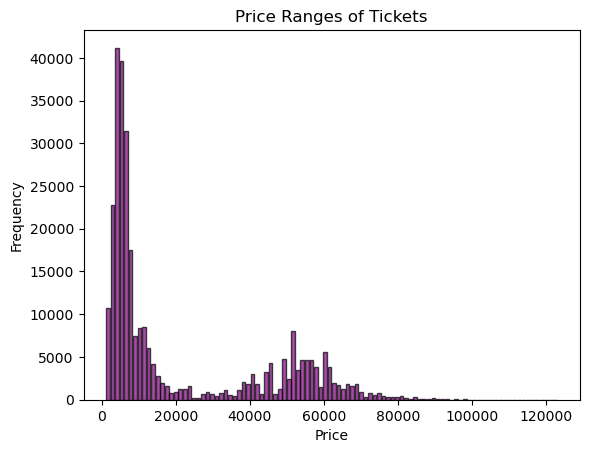

In [253]:
plt.hist(mergedDf['price'], bins=100, edgecolor='black', alpha=0.7 ,color='purple', rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Ranges of Tickets')
plt.show()

### Prices by Airline
How does the price vary between different Airlines?

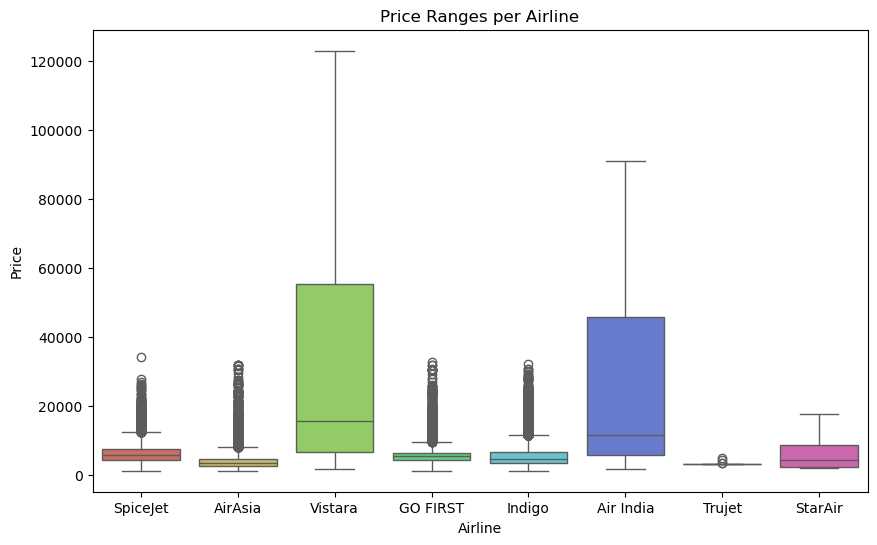

In [254]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='price', data=mergedDf, hue='airline', palette='hls' )
plt.xlabel('Airline')
plt.ylabel('Price')
plt.suptitle("")
plt.title('Price Ranges per Airline')
plt.show()

### Price per Flight Class
How does the price varies between Flight Classes?

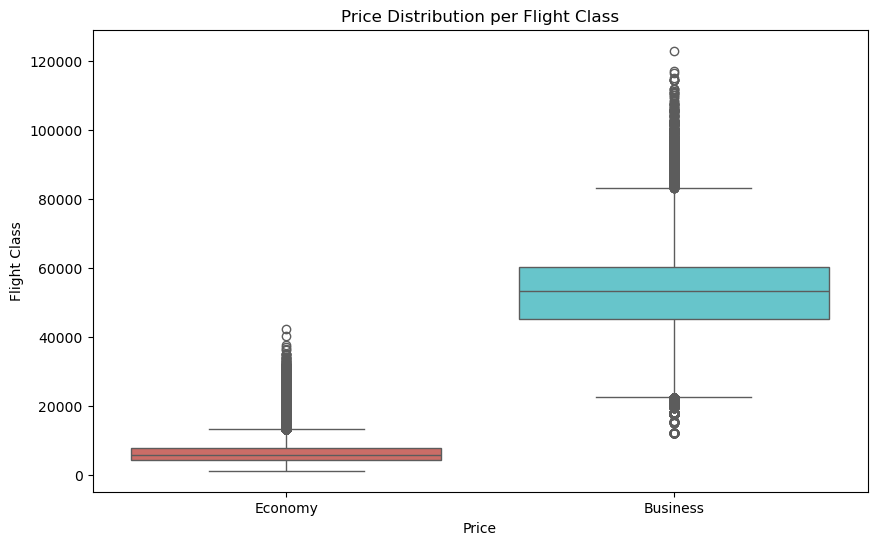

In [255]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='flight_class', y='price', data=mergedDf, hue='flight_class', palette='hls' )
plt.xlabel('Price')
plt.ylabel('Flight Class')
plt.suptitle("")
plt.title('Price Distribution per Flight Class')
plt.show()

Text(0.5, 1.0, 'Airline prices based on the class and company')

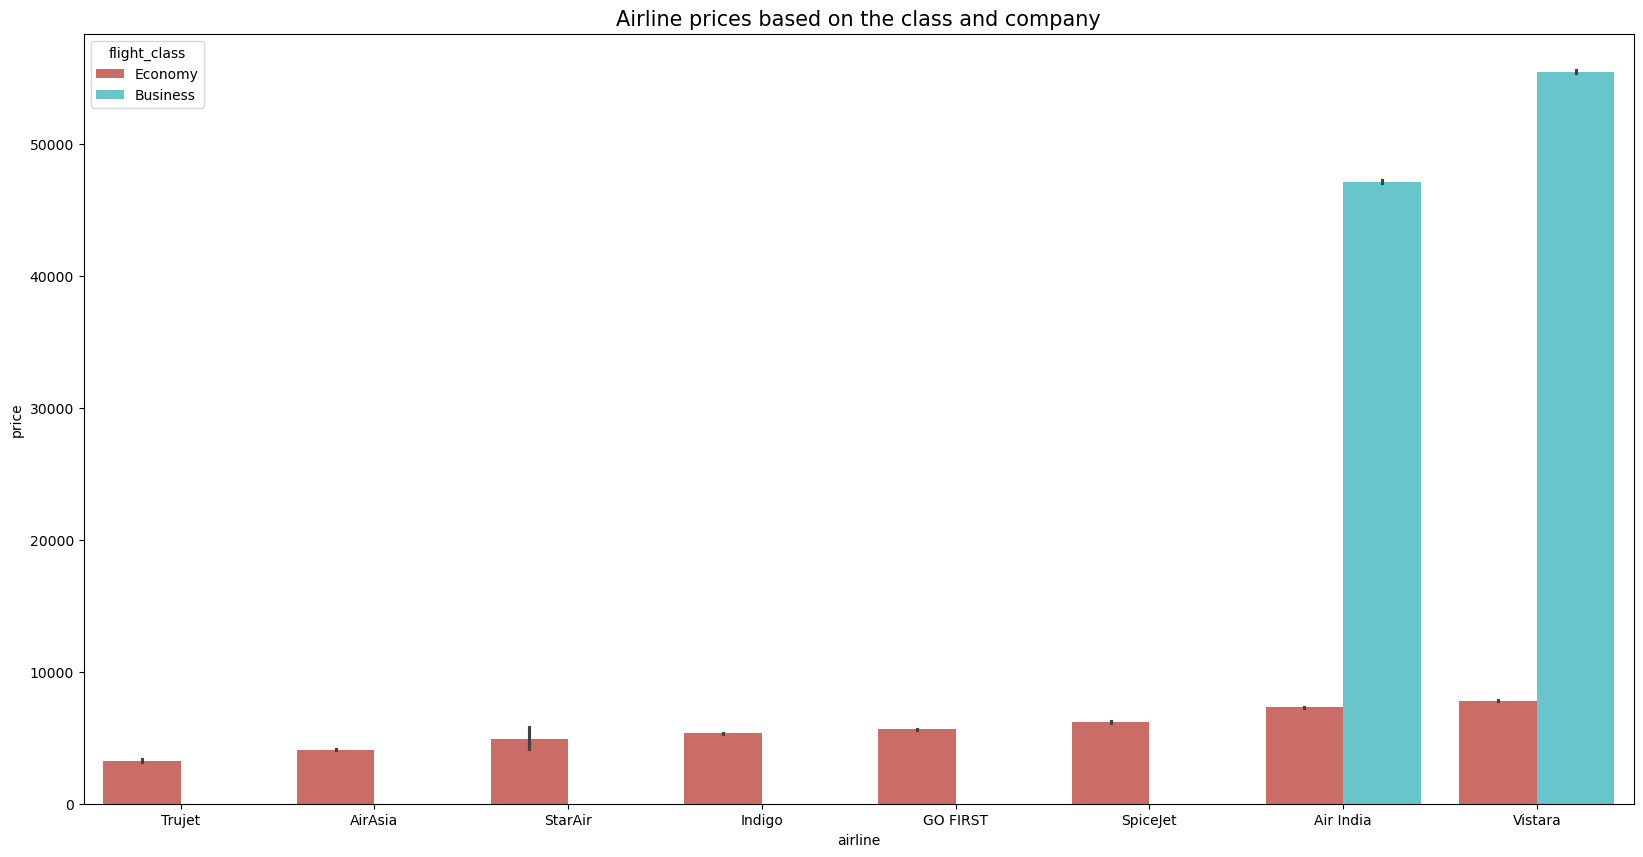

In [256]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline', y='price', hue='flight_class', palette='hls', data=mergedDf, order=mergedDf.groupby('airline')['price'].mean().sort_values().index).set_title('Airline prices based on the class and company', fontsize=15)

Based on this we see that the difference in prices between the different airlines could be explained by the fact that only Air India and Vistara offer Business Flights

### Price per departure time category
How does the time of departure affects the price of the ticket?

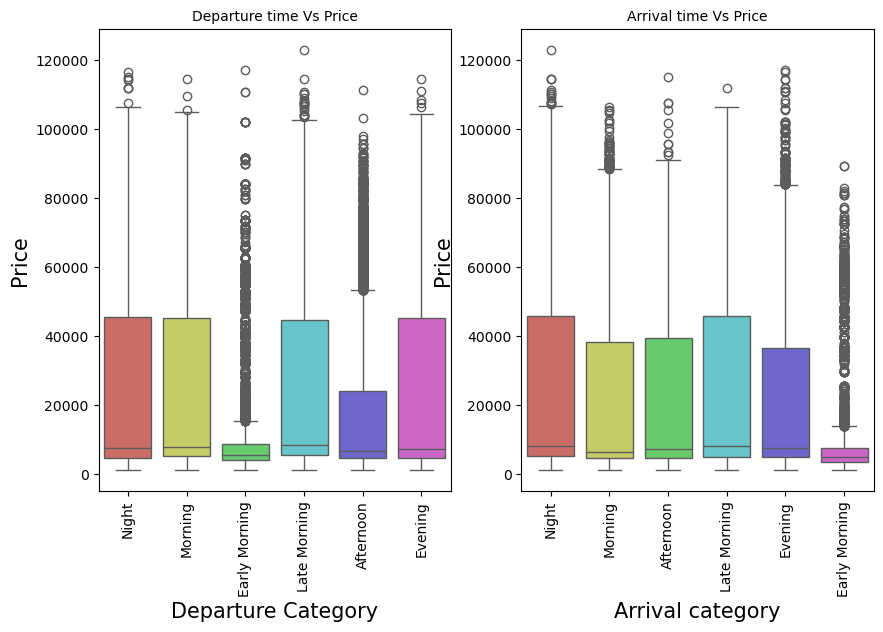

In [257]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='dep_time_category', y='price', hue='dep_time_category', data=mergedDf, palette='hls')
plt.title('Departure time Vs Price',fontsize=10)
plt.xlabel('Departure Category',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False) # To remove the legend

plt.subplot(1,2,2)
sns.boxplot(x='arr_time_category', y='price', hue='arr_time_category', data=mergedDf, palette='hls')
plt.title('Arrival time Vs Price',fontsize=10)
plt.xlabel('Arrival category',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False) # To remove the legend

plt.show()

### Price vs number of stops
How does the number of stops affect the price?

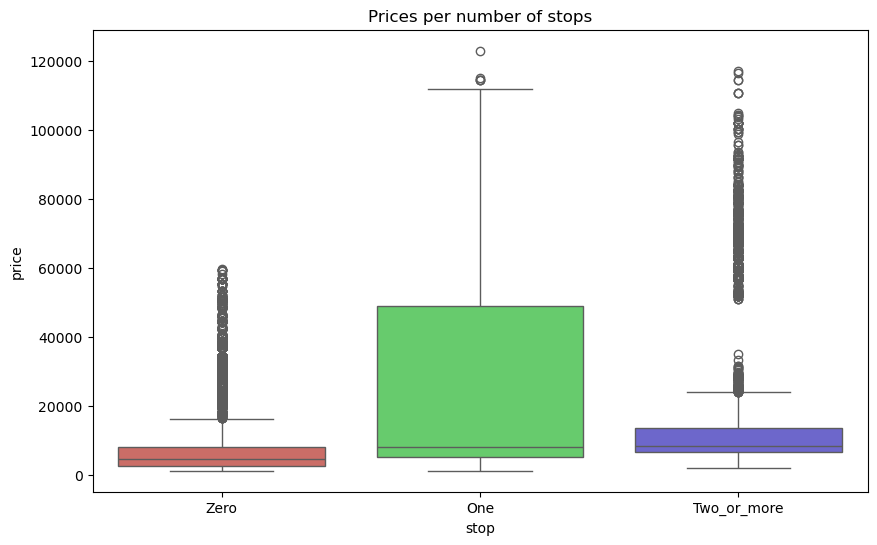

In [258]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stop', y='price', hue='stop', data=mergedDf, palette='hls')
plt.suptitle("")
plt.title("Prices per number of stops")
plt.show()

How does origin/destination cities affect the ticket price?

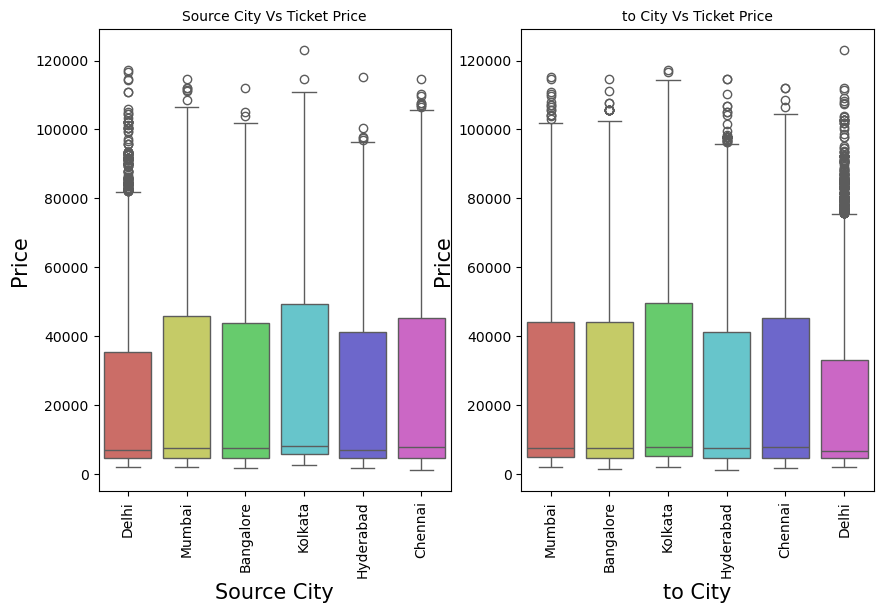

In [259]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='from', y='price', hue='from', data=mergedDf, palette='hls')
plt.title('Source City Vs Ticket Price',fontsize=10)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False) # To remove the legend

plt.subplot(1,2,2)
sns.boxplot(x='to', y='price', hue='to', data=mergedDf, palette='hls')
plt.title('to City Vs Ticket Price',fontsize=10)
plt.xlabel('to City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False) # To remove the legend

plt.show()


**Let's plot price vs days left for departure to check if there is a relationship among these for each flight class**

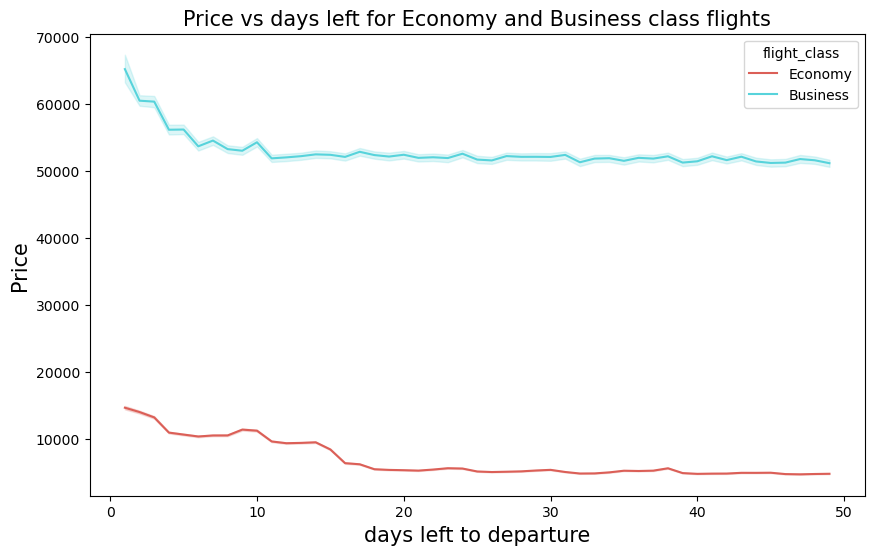

In [260]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mergedDf,x='days_left',y='price', hue='flight_class',palette='hls')
plt.title('Price vs days left for Economy and Business class flights',fontsize=15)
plt.xlabel('days left to departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Let's check if there is some obvious relationship between departure time and price

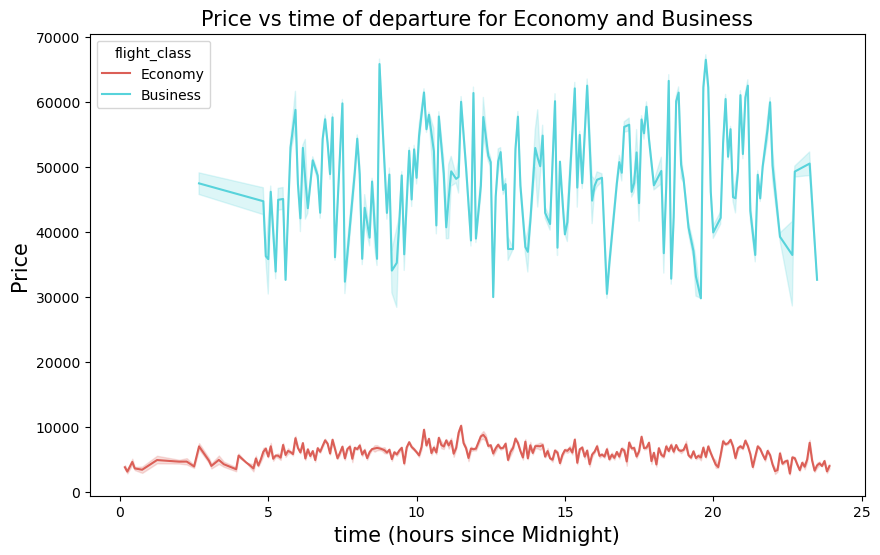

In [261]:
plt.figure(figsize=(10,6))
x_hours = mergedDf
sns.lineplot(data=mergedDf, x='dep_hours',y='price', hue='flight_class',palette='hls')
plt.title('Price vs time of departure for Economy and Business',fontsize=15)
plt.xlabel('time (hours since Midnight)',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Price vs days left for departure for different Airlines?

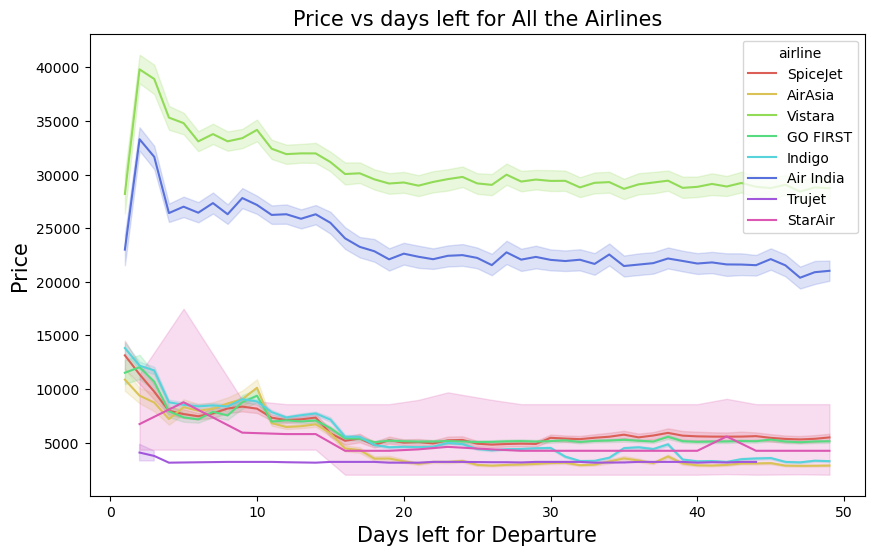

In [262]:
plt.figure(figsize=(10,6))
x_hours = mergedDf
sns.lineplot(data=mergedDf, x='days_left',y='price', hue='airline',palette='hls')
plt.title('Price vs days left for All the Airlines',fontsize=15)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


Lets see if there is any difference between the different departure time categories 

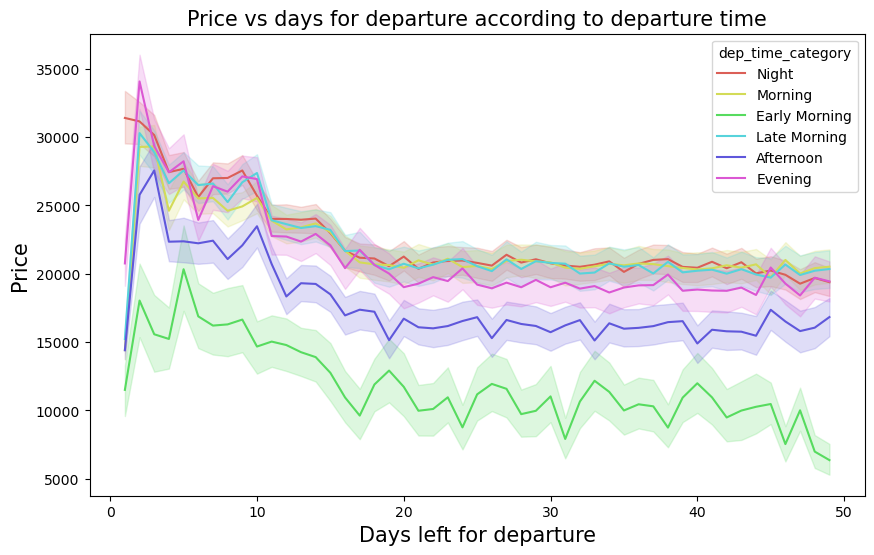

In [263]:
plt.figure(figsize=(10,6))
x_hours = mergedDf
sns.lineplot(data=mergedDf, x='days_left',y='price', hue='dep_time_category',palette='hls')
plt.title('Price vs days for departure according to departure time',fontsize=15)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


In [325]:
mergedDf.to_csv("Final Dataset.csv")

# Model Building

### Encode all the categorical Variables using One hot encoding

In [264]:
# Get dummy variables for specified columns
# Specify the categorical columns
categorical_columns = ['flight_class','from', 'to', 'stop', 'airline', 'arr_time_category', 'dep_time_category']

# Get dummy variables for specified columns
mergedDf_dummies = pd.get_dummies(mergedDf, columns=categorical_columns, drop_first=True, dtype=float)


In [265]:
mergedDf_dummies.columns

Index(['dep_time', 'arr_time', 'price', 'flight_code', 'days_left',
       'flight_time', 'dep_hours', 'arr_hours', 'flight_class_Economy',
       'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'arr_time_category_Early Morning', 'arr_time_category_Evening',
       'arr_time_category_Late Morning', 'arr_time_category_Morning',
       'arr_time_category_Night', 'dep_time_category_Early Morning',
       'dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night'],
      dtype='object')

### Correlation between continuous data and price

In [266]:
corrQuant = mergedDf_dummies[['price','days_left','flight_time','dep_hours','arr_hours' ]].corr()
corrQuant['price']

price          1.000000
days_left     -0.091924
flight_time    0.204462
dep_hours      0.032644
arr_hours      0.076469
Name: price, dtype: float64

### Heatmap showing Correlation between continuous data in our DataFrame

<Axes: >

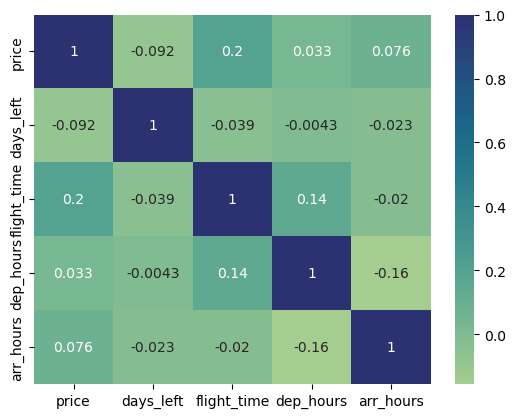

In [267]:
sns.heatmap(corrQuant, annot=True, cmap="crest")

### Correlation between price and categorical data using 1 hot encoding

In [268]:
corrCat = mergedDf_dummies[['price','flight_class_Economy',
       'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi',
       'to_Hyderabad', 'to_Kolkata', 'to_Mumbai',
       'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'arr_time_category_Early Morning',
       'arr_time_category_Evening', 'arr_time_category_Late Morning',
       'arr_time_category_Morning', 'arr_time_category_Night',
       'dep_time_category_Early Morning', 'dep_time_category_Evening',
       'dep_time_category_Late Morning', 'dep_time_category_Morning',
       'dep_time_category_Night']].corr()


### Check the correlations for Price:

Correlation coefficient values exceeding 0.25

In [269]:
corrCat[abs(corrCat['price']) > 0.25]['price']

price                   1.000000
flight_class_Economy   -0.937868
airline_Indigo         -0.280744
airline_Vistara         0.360953
Name: price, dtype: float64

Let's get a heatmap with all the correlations to check for the strongly correlated variables 

<Axes: >

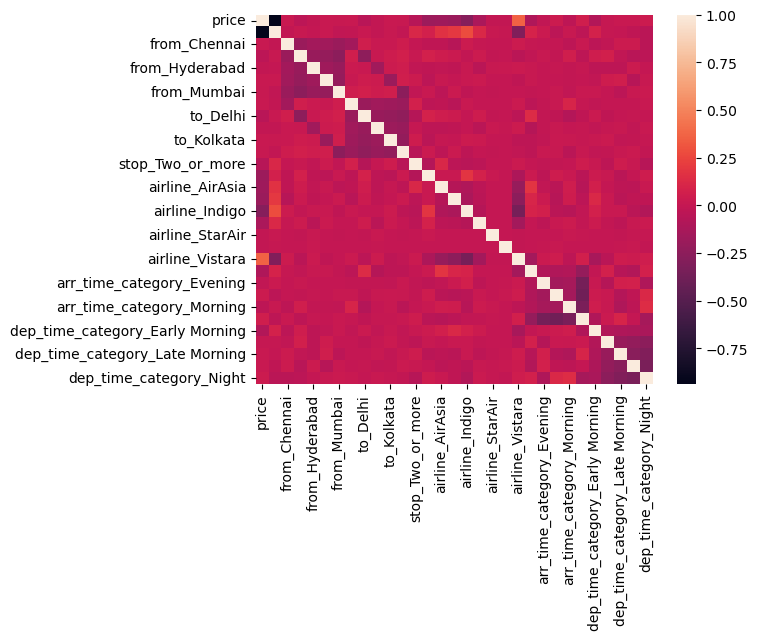

In [270]:
sns.heatmap(corrCat, annot=False )

## Linear Model using One Hot Encoding:

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


XHotEncoding = mergedDf_dummies.select_dtypes(include=np.number).drop('price', axis="columns")

target = mergedDf_dummies['price']  

X_train, X_test, y_train, y_test = train_test_split(XHotEncoding, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 45998672.797876045
R-squared: 0.9111249816944686


Another Linear Model regression but using statsmodel package to get the p values directly

In [272]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Necessary to add an intercept
X_train = sm.add_constant(X_train)
# Fit the model
Linear_model = sm.OLS(y_train, X_train).fit()
# Prediction 
y_pred = Linear_model.predict(sm.add_constant(X_test))
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r_squared}")
print(Linear_model.summary())
for x in range(0,len(X_train.columns)): 
    print(f"{X_train.columns[x]} p-value: {Linear_model.pvalues[x]}")

MSE: 45998672.79787605
R^2: 0.9111249816944686
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 7.293e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:54:15   Log-Likelihood:            -2.4584e+06
No. Observations:              240205   AIC:                         4.917e+06
Df Residuals:                  240170   BIC:                         4.917e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

According with the p-value analysis we decided to drop columns 'arr_hours' , 'from_Chennai' , 'to_Mumbai', 'airline_AirAsia' , 'airline_Trujet' , 'dep_time_category_Night'

## Variance Inflation Factor Analysis (Multicollinearity analysis)

In [273]:
# Create a VIF dataFrame
# Calculate VIF for each numeric column
vif = pd.DataFrame()
# Add a constant term to allow VIF calculation for the intercept
XHotEncoding['Intercept'] = 1
vif['Variable'] = XHotEncoding.columns
vif['VIF'] = [variance_inflation_factor(XHotEncoding.values, i) for i in range(XHotEncoding.shape[1])]


In [274]:
# Variables with Strong multicollinearity 
vif[vif['VIF'] > 5.0]

,Variable,VIF
2,dep_hours,30.249518
3,arr_hours,21.055515
24,arr_time_category_Early Morning,5.510212
28,arr_time_category_Night,11.659842
32,dep_time_category_Morning,9.318674
33,dep_time_category_Night,12.588313
34,Intercept,337.080229


To avoid running manually test of multicollinearity multiple times dropping variables each time one has a larger VIF value than 5, let's write a loop that does that for us: 

In [275]:
# use another dataFrame to check for multicollinearity largest VIF first
X_vif = XHotEncoding
# Initialize a flag to indicate presence of multicollinearity
multicollinearity_present = True

while multicollinearity_present:
    # Calculate VIF for each numeric column
    vif = pd.DataFrame()
    vif['Variable'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    # Exclude the 'Intercept' column when checking for high VIF
    vif_no_intercept = vif[vif['Variable'] != 'Intercept']

    # Check if any variables (excluding 'Intercept') have VIF > 5
    if vif_no_intercept['VIF'].max() > 5:
        # Identify variable with largest VIF
        variable_to_drop = vif_no_intercept.loc[vif_no_intercept['VIF'].idxmax(), 'Variable']

        # Drop variable from DataFrame
        X_vif = X_vif.drop(columns=[variable_to_drop])

        print(f"Dropped {variable_to_drop} due to high VIF.")
    else:
        multicollinearity_present = False

print("No multicollinearity present.")

Dropped dep_hours due to high VIF.
Dropped arr_hours due to high VIF.
No multicollinearity present.


Repeat the Linear Regression without the collinear columns

In [276]:
target = mergedDf_dummies['price']  
X_train, X_test, y_train, y_test = train_test_split(X_vif, target, test_size=0.2, random_state=42)
# Fit the model, No need to add the constant column as it is already on X_vif
model_without_collinear = sm.OLS(y_train, X_train).fit()
# Prediction 
y_pred = model_without_collinear.predict(sm.add_constant(X_test))
# Calculate metrics
print("Metrics Calculations:")
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r_squared}")
print(model_without_collinear.summary())
print("Variables with p-values > 0.05:")
for x in range(0,len(X_train.columns)): 
    if(model_without_collinear.pvalues[x] > 0.05):
        print(f"{X_train.columns[x]} p-value: {model_without_collinear.pvalues[x]}")
    
    

Metrics Calculations:
MSE: 46011703.17942864
R^2: 0.9110998054159247
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 7.747e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:54:58   Log-Likelihood:            -2.4585e+06
No. Observations:              240205   AIC:                         4.917e+06
Df Residuals:                  240172   BIC:                         4.917e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Based on the previous Result our final model shouldn't  use 'from_Chennai' and 'airline_Trujet' as predictors. Let's use a loop to drop all the columns that are not statistically significant 

In [277]:
target = mergedDf_dummies['price']  
X_train, X_test, y_train, y_test = train_test_split(X_vif, target, test_size=0.2, random_state=42)

# Initialize a flag to indicate presence of insignificant variables
insignificant_present = True

while insignificant_present:
    # Fit the model
    model_without_collinear = sm.OLS(y_train, X_train).fit()

    # Check if any variables have p-value > 0.05
    if max(model_without_collinear.pvalues) > 0.05:
        # Identify variable with largest p-value
        variable_to_drop = model_without_collinear.pvalues.idxmax()

        # Drop variable from DataFrame
        X_train = X_train.drop(columns=[variable_to_drop])
        X_test = X_test.drop(columns=[variable_to_drop])

        print(f"Dropped {variable_to_drop} due to high p-value.")
    else:
        insignificant_present = False

# Prediction 
y_pred = model_without_collinear.predict(sm.add_constant(X_test))

# Calculate metrics
print("Metrics Calculations:")
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r_squared}")
print(model_without_collinear.summary())

Dropped airline_Trujet due to high p-value.
Dropped from_Chennai due to high p-value.
Dropped airline_AirAsia due to high p-value.
Dropped to_Mumbai due to high p-value.
Metrics Calculations:
MSE: 46010591.54627439
R^2: 0.911101953226088
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 8.853e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:55:00   Log-Likelihood:            -2.4585e+06
No. Observations:              240205   AIC:                         4.917e+06
Df Residuals:                  240176   BIC:                         4.917e+06
Df Model:                          28                                         
Covariance Type:            nonrobust              

# Random Forest Using One Hot Encoder


In [278]:
X = mergedDf_dummies.drop(['dep_time','arr_time','flight_code','price'], axis="columns")
y= mergedDf_dummies['price']
X.head()

,days_left,flight_time,dep_hours,arr_hours,flight_class_Economy,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,...,arr_time_category_Early Morning,arr_time_category_Evening,arr_time_category_Late Morning,arr_time_category_Morning,arr_time_category_Night,dep_time_category_Early Morning,dep_time_category_Evening,dep_time_category_Late Morning,dep_time_category_Morning,dep_time_category_Night
0,1,130,18.916667,21.083333,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,140,6.333333,8.666667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,130,4.416667,6.583333,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,135,10.333333,12.583333,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,140,8.833333,11.166667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Train/ test split and Fitting the model


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)



RandomForestRegressor()

In [280]:
y_pred= reg.predict(X_test)

Accuracy and R^2 of the random Forest Regressor

In [281]:
accuracy=mean_squared_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
print(f"Accuracy of random Forrest using One hot encoding: {accuracy}")
print(f"R^2: {r_score}")

Accuracy of random Forrest using One hot encoding: 5554438.019169503
R^2: 0.9892580096518665


### Feature Importance:

In [282]:

# Get the feature importances
importances = reg.feature_importances_


# Print the feature importances
print("Feature Importance")
for i in range(len(importances)):
    print(f"Feature {X_train.columns[i]}: {importances[i]}")

Feature Importance
Feature days_left: 0.018062259303565642
Feature flight_time: 0.04746966022638307
Feature dep_hours: 0.008677807536739841
Feature arr_hours: 0.010773519766930861
Feature flight_class_Economy: 0.8796344964851468
Feature from_Chennai: 0.0010588405098765242
Feature from_Delhi: 0.0033513078951138047
Feature from_Hyderabad: 0.001471115218956204
Feature from_Kolkata: 0.0018450673850764123
Feature from_Mumbai: 0.001752703321645026
Feature to_Chennai: 0.0009616978682774411
Feature to_Delhi: 0.003302552862532361
Feature to_Hyderabad: 0.0016705694109669692
Feature to_Kolkata: 0.001812990506942604
Feature to_Mumbai: 0.0021365464663527026
Feature stop_Two_or_more: 0.001763032526438612
Feature stop_Zero: 4.4412022536399106e-05
Feature airline_AirAsia: 0.0005767373471641569
Feature airline_GO FIRST: 0.00022031567621381157
Feature airline_Indigo: 0.00043206790633684906
Feature airline_SpiceJet: 0.00017598957658818774
Feature airline_StarAir: 1.2872565209282219e-06
Feature airline_Tr

### Top 10 most important features for the random forest regressor

In [283]:
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Print the top 10 most important features
print("Top 10 most important features:")
for i in range(10):
    print(f"{i+1}. Feature {X_train.columns[indices[i]]}: {importances[indices[i]]}")

Top 10 most important features:
1. Feature flight_class_Economy: 0.8796344964851468
2. Feature flight_time: 0.04746966022638307
3. Feature days_left: 0.018062259303565642
4. Feature arr_hours: 0.010773519766930861
5. Feature airline_Vistara: 0.009309369505050806
6. Feature dep_hours: 0.008677807536739841
7. Feature from_Delhi: 0.0033513078951138047
8. Feature to_Delhi: 0.003302552862532361
9. Feature to_Mumbai: 0.0021365464663527026
10. Feature from_Kolkata: 0.0018450673850764123


# Linear Regression using label encoding

We will try to use a different encoding to check if we get better/different results. This time we will be using the flight code too as a prediction variable. 



In [284]:
mergedDf.head()

,airline,dep_time,from,stop,arr_time,to,price,flight_class,flight_code,days_left,dep_time_category,arr_time_category,flight_time,dep_hours,arr_hours
0,SpiceJet,18:55,Delhi,Zero,21:05,Mumbai,5953,Economy,SG-8709,1,Night,Night,130,18.916667,21.083333
1,SpiceJet,06:20,Delhi,Zero,08:40,Mumbai,5953,Economy,SG-8157,1,Morning,Morning,140,6.333333,8.666667
2,AirAsia,04:25,Delhi,Zero,06:35,Mumbai,5956,Economy,I5-764,1,Early Morning,Morning,130,4.416667,6.583333
3,Vistara,10:20,Delhi,Zero,12:35,Mumbai,5955,Economy,UK-995,1,Late Morning,Afternoon,135,10.333333,12.583333
4,Vistara,08:50,Delhi,Zero,11:10,Mumbai,5955,Economy,UK-963,1,Morning,Late Morning,140,8.833333,11.166667


### Encoding to labels

In [285]:
from sklearn.preprocessing import LabelEncoder
columns_to_label_encode = ['airline', 'arr_time_category','dep_time_category', 'from', 'stop', 'to','flight_class', 'flight_code']
label_encoder = LabelEncoder()
for col in columns_to_label_encode:
    mergedDf[col+"_encoded"] = label_encoder.fit_transform(mergedDf[col])
mergedDf.columns



Index(['airline', 'dep_time', 'from', 'stop', 'arr_time', 'to', 'price',
       'flight_class', 'flight_code', 'days_left', 'dep_time_category',
       'arr_time_category', 'flight_time', 'dep_hours', 'arr_hours',
       'airline_encoded', 'arr_time_category_encoded',
       'dep_time_category_encoded', 'from_encoded', 'stop_encoded',
       'to_encoded', 'flight_class_encoded', 'flight_code_encoded'],
      dtype='object')

Ignoring dep_hours and arr_hours from previous analysis in multicollinearity

In [286]:
# select only numerical columns
selected_data = mergedDf.select_dtypes(include=np.number).drop(['dep_hours', 'arr_hours'], axis='columns')
selected_corr = selected_data.corr()
print("Correlation Matrix for Selected Columns in Label Encoded DataFrame:")
print(selected_corr)


Correlation Matrix for Selected Columns in Label Encoded DataFrame:
                              price  days_left  flight_time  airline_encoded  \
price                      1.000000  -0.091924     0.204462         0.243707   
days_left                 -0.091924   1.000000    -0.039123        -0.003192   
flight_time                0.204462  -0.039123     1.000000        -0.006748   
airline_encoded            0.243707  -0.003192    -0.006748         1.000000   
arr_time_category_encoded  0.065868  -0.008630     0.041852         0.072045   
dep_time_category_encoded  0.076046  -0.007831     0.145883         0.057846   
from_encoded               0.004673  -0.003549     0.008800        -0.035582   
stop_encoded              -0.202721  -0.007020    -0.473940        -0.034046   
to_encoded                 0.004900  -0.005313     0.001983        -0.038946   
flight_class_encoded      -0.937868   0.013028    -0.138945        -0.178116   
flight_code_encoded        0.306188  -0.000458     0

### Creating heatmap of correlation matrix 

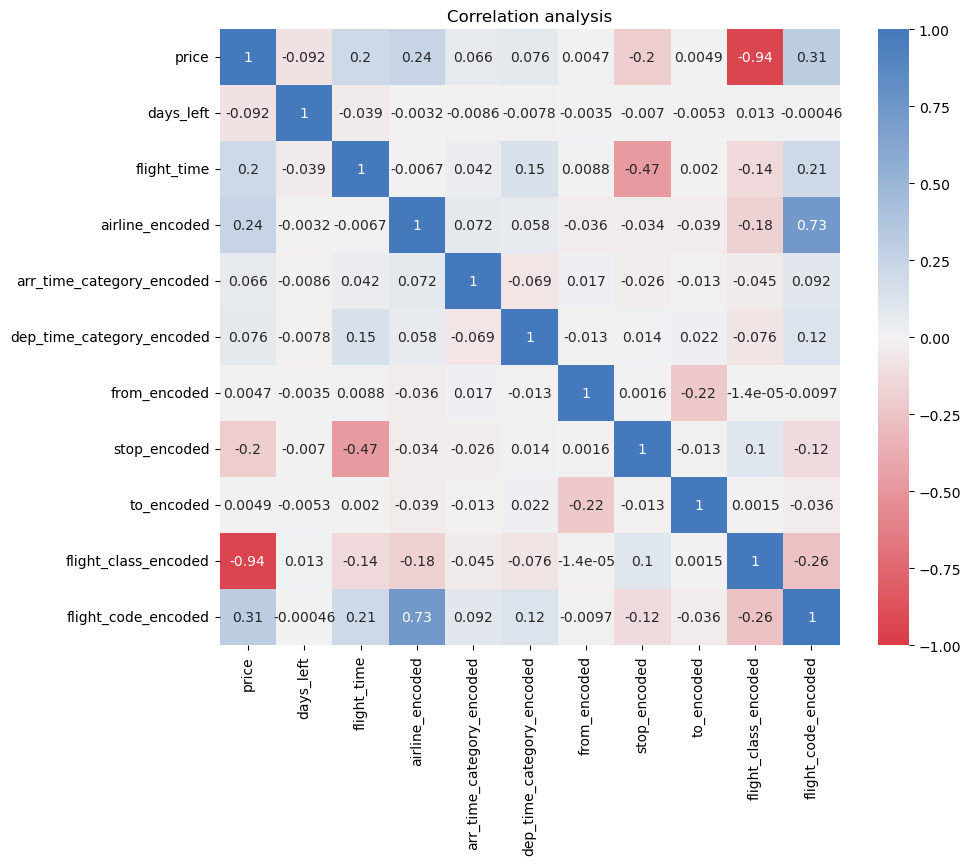

In [287]:

cmap = sns.diverging_palette(250, 10, as_cmap=True)
cmap_reversed = cmap.reversed()
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr, annot=True, cmap=cmap_reversed, center=0, vmin=-1, vmax=1)
plt.title('Correlation analysis')
plt.show()


### Running the model and calculating absolute Error percentage

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
features = selected_data.drop('price', axis='columns')  # our chosen columns
target = mergedDf['price']  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
price_diff = y_test - predictions
absolute_error_percentage = (abs(y_test - predictions) / y_test) * 100
results_df = pd.DataFrame({
    'Actual Prices': y_test,
    'Predicted Prices': predictions,
    'Price Difference': price_diff,
    'Absolute Error (%)': absolute_error_percentage
})
print(results_df)
results_df['Absolute Error (%)'] = results_df['Absolute Error (%)'].clip(0, 100)




Mean Squared Error: 49434270.65222252
R-squared: 0.9044869896911518
        Actual Prices  Predicted Prices  Price Difference  Absolute Error (%)
228853          34460      44849.252745     -10389.252745           30.148731
139341           6195      10749.232646      -4554.232646           73.514651
11033           10523       9988.676739        534.323261            5.077670
180445           1543      -2564.044506       4107.044506          266.172683
20818            5953       8219.007221      -2266.007221           38.064963
...               ...               ...               ...                 ...
70860            7584       8422.973001       -838.973001           11.062408
210876          34472      45103.859536     -10631.859536           30.842015
117271           4672      11453.046551      -6781.046551          145.142264
195918           4755       9959.559532      -5204.559532          109.454459
256490          37985      56113.033105     -18128.033105           47.724

### Actual vs predicted prices for the linear model 

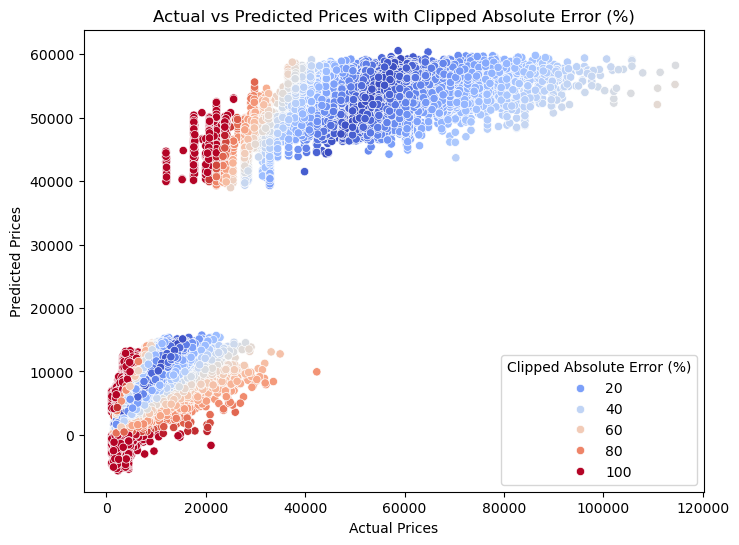

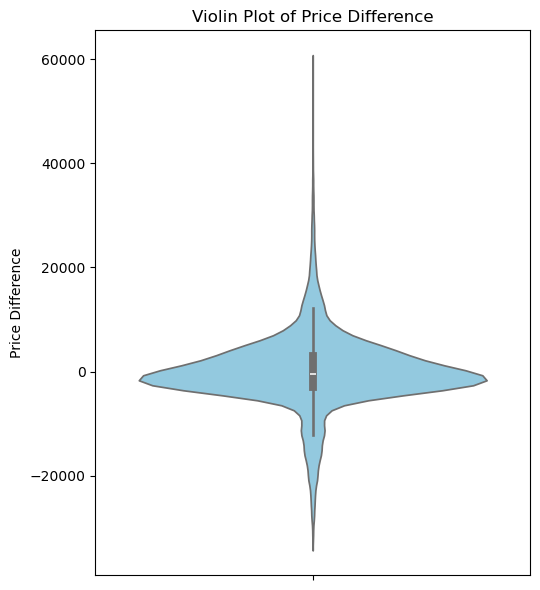

In [289]:

# Scatter plot of actual vs predicted prices, color-coded by clipped absolute error percentage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Prices', y='Predicted Prices', hue='Absolute Error (%)', data=results_df, palette='coolwarm')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Clipped Absolute Error (%)')
plt.legend(title='Clipped Absolute Error (%)')
plt.show()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

## Violin plot of price differences
sns.violinplot(y='Price Difference', data=results_df, color='skyblue')
plt.title('Violin Plot of Price Difference')
plt.tight_layout()
plt.show()

### Histogram of price difference

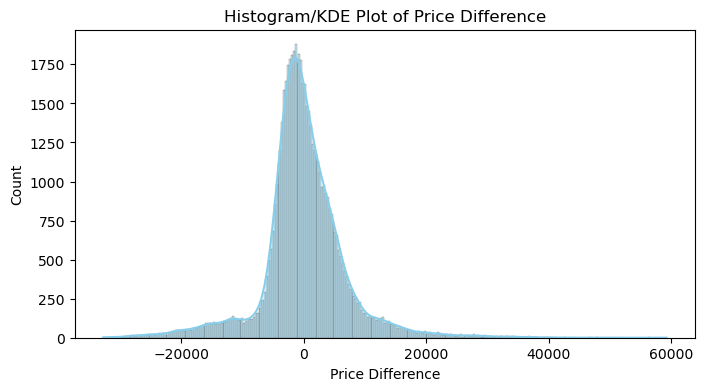

In [290]:
# Histogram/KDE plot for Price Difference
plt.figure(figsize=(8, 4))
sns.histplot(results_df['Price Difference'], kde=True, color='skyblue')
plt.xlabel('Price Difference')
plt.title('Histogram/KDE Plot of Price Difference')
plt.show()


### Plotting Absolute Error using a histogram  

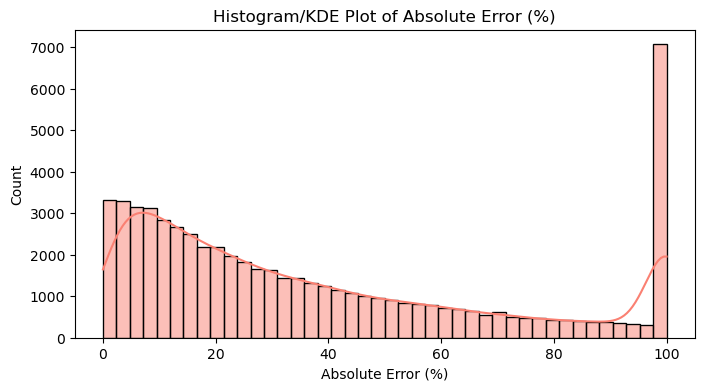

In [291]:

# Histogram/KDE plot for Absolute Error (%)
plt.figure(figsize=(8, 4))
sns.histplot(results_df['Absolute Error (%)'], kde=True, color='salmon')
plt.xlabel('Absolute Error (%)')
plt.title('Histogram/KDE Plot of Absolute Error (%)')
plt.show()


## Residual plot for label encoding model

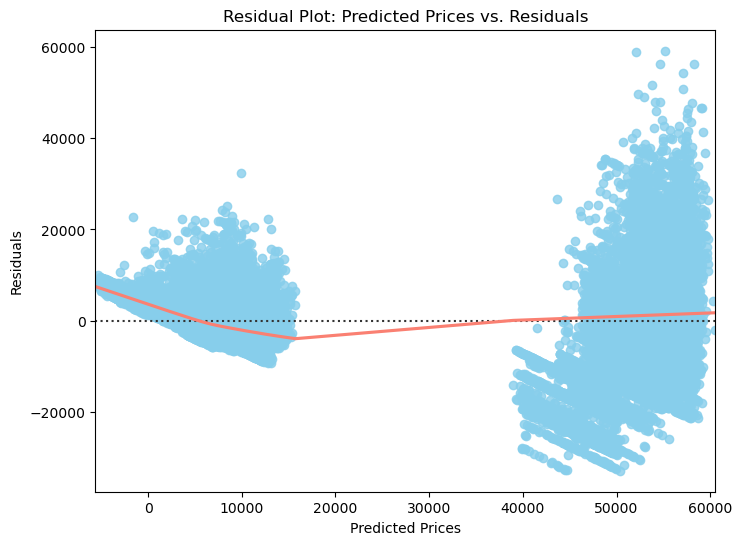

In [292]:
# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=results_df['Predicted Prices'], y=results_df['Price Difference'], lowess=True, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'salmon'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted Prices vs. Residuals')
plt.show()

In [293]:

# Linear Regression
X_lr = selected_data.drop('price', axis='columns')
y_lr = selected_data['price']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.30)

regressor_lr = LinearRegression()
regressor_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = regressor_lr.predict(X_test_lr)

# Regression metrics for Linear Regression
accuracy_lr = mean_squared_error(y_test_lr, y_pred_lr)
r_score_lr = r2_score(y_test_lr, y_pred_lr)
print("Linear Regression Metrics:")
print("Mean Squared Error:", accuracy_lr)
print("R^2 Score:", r_score_lr)

# Random Forest Regressor
X_rf = selected_data.drop('price', axis='columns')
y_rf = selected_data['price']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30)

regressor_rf = RandomForestRegressor(n_estimators=100)
regressor_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = regressor_rf.predict(X_test_rf)

# Regression metrics for Random Forest
accuracy_rf = mean_squared_error(y_test_rf, y_pred_rf)
r_score_rf = r2_score(y_test_rf, y_pred_rf)
print("\nRandom Forest Regression Metrics:")
print("Mean Squared Error:", accuracy_rf)
print("R^2 Score:",r_score_rf)

Linear Regression Metrics:
Mean Squared Error: 48757531.9952344
R^2 Score: 0.9046894511549548

Random Forest Regression Metrics:
Mean Squared Error: 5581385.462091091
R^2 Score: 0.9891414873523212


## Classification  Analysis


### Let's run a classification analysis to find out the Flight class of a flight based on all the other relevant factors

### Using a random forrest

In [294]:
#Classification analysis with random forest clasiffier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Calling again the hot encoded dataFrame

In [295]:
mergedDf_dummies.columns

Index(['dep_time', 'arr_time', 'price', 'flight_code', 'days_left',
       'flight_time', 'dep_hours', 'arr_hours', 'flight_class_Economy',
       'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'arr_time_category_Early Morning', 'arr_time_category_Evening',
       'arr_time_category_Late Morning', 'arr_time_category_Morning',
       'arr_time_category_Night', 'dep_time_category_Early Morning',
       'dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night'],
      dtype='object')

According to our labeling flight_class_economy = 1 when class is economy and equals 0 when flight is business

Run a random Forest Classifier based on Price, Origin, Destine,Departure time, Airline  and number of stops

# Classification using a single tree

### Performing a classification with a single Tree

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features (X) and target variable (y)
# using the encoded Dataframe
X_encoded = mergedDf_dummies[['price', 'days_left',
       'flight_time', 'dep_hours', 'arr_hours',
       'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'arr_time_category_Early Morning', 'arr_time_category_Evening',
       'arr_time_category_Late Morning', 'arr_time_category_Morning',
       'arr_time_category_Night', 'dep_time_category_Early Morning',
       'dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night']]

y = mergedDf_dummies['flight_class_Economy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Accuracy: 0.999833477652701
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18726
         1.0       1.00      1.00      1.00     41326

    accuracy                           1.00     60052
   macro avg       1.00      1.00      1.00     60052
weighted avg       1.00      1.00      1.00     60052

Decision Tree Confusion Matrix:
 [[18721     5]
 [    5 41321]]


### Now using a radom Forrest Classifier

In [297]:

X = mergedDf_dummies[['price',"days_left",'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara','dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night']]

y = mergedDf_dummies['flight_class_Economy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[18723     3]
 [    8 41318]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18726
         1.0       1.00      1.00      1.00     41326

    accuracy                           1.00     60052
   macro avg       1.00      1.00      1.00     60052
weighted avg       1.00      1.00      1.00     60052



So the model achieved excellent performance

In [298]:
X.head()
len(X.columns)

25

A  SAMPLE TEST PREDICTION

A $ 7000 ticket price, in 10 days, from Chennai to Delhi with 1 stop, on Visatara AIrline, departure in the morning

In [299]:
# Let's see some of the predictions for 'isBusiness'
new_data = {
    "price":[7000],
    'days_left':[10],
    'from_Chennai':[1], 
    'from_Delhi':[0], 
    'from_Hyderabad':[0], 
    'from_Kolkata':[0],
    'from_Mumbai':[0],
    'to_Chennai':[0],
    'to_Delhi':[1], 
    'to_Hyderabad':[0], 
    'to_Kolkata':[0],
    'to_Mumbai':[0], 
    'stop_Two_or_more':[0], 
    'stop_Zero':[0],
    'airline_AirAsia':[0],
    'airline_GO FIRST':[0], 
    'airline_Indigo':[0], 
    'airline_SpiceJet':[0],
    'airline_StarAir':[0], 
    'airline_Trujet':[0], 
    'airline_Vistara':[1],
    'dep_time_category_Evening':[0], 
    'dep_time_category_Late Morning':[0],
    'dep_time_category_Morning':[1], 
    'dep_time_category_Night':[0],
}


new_df = pd.DataFrame(new_data)
predicted_values = clf.predict(new_df)
print(predicted_values)

[1.]


### Let's see the plot of the confusion Matrix

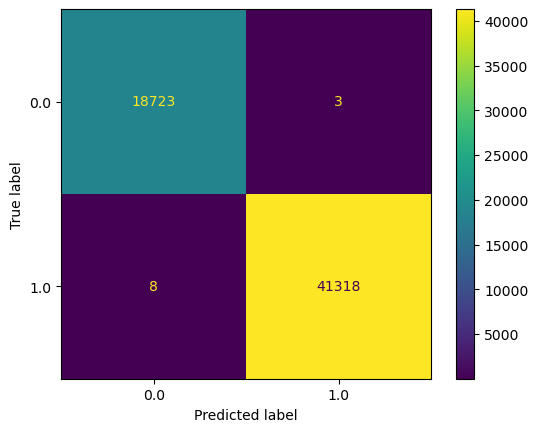

In [300]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix1 = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=clf.classes_)
disp.plot()


Now, let's run a feature selection process to get the top 10 more important features to find the

### Find the top 10 features

In [301]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = mergedDf_dummies[['price',"days_left",'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara','dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night']]
y = mergedDf_dummies['flight_class_Economy'] 

# Select the top 10 features
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# Print the selected features
print(X.columns[selector.get_support(indices=True)])

Index(['price', 'days_left', 'stop_Two_or_more', 'stop_Zero',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'dep_time_category_Night'],
      dtype='object')


Based on this 10 features , let's check our performance again

In [302]:

X = mergedDf_dummies[['price', 'days_left', 'stop_Two_or_more', 'stop_Zero',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'dep_time_category_Night']]
y = mergedDf_dummies['flight_class_Economy'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[18724     2]
 [    7 41319]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18726
         1.0       1.00      1.00      1.00     41326

    accuracy                           1.00     60052
   macro avg       1.00      1.00      1.00     60052
weighted avg       1.00      1.00      1.00     60052



So again, really good scores. No surprises there, we are still using price as a predictor. let's Check again but this time let's exclude the price feature and see If we can get the flight category based on the other features

### Classification without the use of price as a feature

In [303]:
X = mergedDf_dummies[["days_left",'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'stop_Two_or_more', 'stop_Zero', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara','dep_time_category_Evening', 'dep_time_category_Late Morning',
       'dep_time_category_Morning', 'dep_time_category_Night']]
y = mergedDf_dummies['flight_class_Economy'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 0.62
Confusion Matrix:
[[ 5607 13119]
 [ 9843 31483]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.30      0.33     18726
         1.0       0.71      0.76      0.73     41326

    accuracy                           0.62     60052
   macro avg       0.53      0.53      0.53     60052
weighted avg       0.60      0.62      0.61     60052



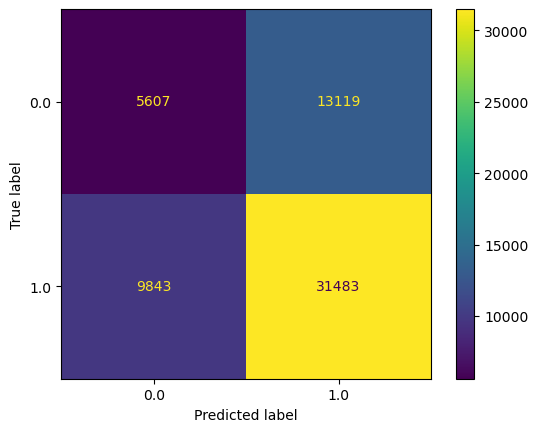

In [304]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix2 = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=clf.classes_)
disp.plot()



Let's get the most important features from our current one

### Clustering Analysis

We will use the following packages and dataframe 

In [305]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
print(mergedDf)
print(mergedDf.columns)

         airline dep_time     from  stop arr_time         to  price  \
0       SpiceJet    18:55    Delhi  Zero    21:05     Mumbai   5953   
1       SpiceJet    06:20    Delhi  Zero    08:40     Mumbai   5953   
2        AirAsia    04:25    Delhi  Zero    06:35     Mumbai   5956   
3        Vistara    10:20    Delhi  Zero    12:35     Mumbai   5955   
4        Vistara    08:50    Delhi  Zero    11:10     Mumbai   5955   
...          ...      ...      ...   ...      ...        ...    ...   
300256   Vistara    09:45  Chennai   One    19:50  Hyderabad  69265   
300257   Vistara    12:30  Chennai   One    22:55  Hyderabad  77105   
300258   Vistara    07:05  Chennai   One    20:55  Hyderabad  79099   
300259   Vistara    07:00  Chennai   One    17:00  Hyderabad  81585   
300260   Vistara    09:45  Chennai   One    19:50  Hyderabad  81585   

       flight_class flight_code  days_left  ...  dep_hours  arr_hours  \
0           Economy     SG-8709          1  ...  18.916667  21.083333   
1

### First will performed the Clustering with two continous variables 

#### Elbow Method to determine the number of clusters

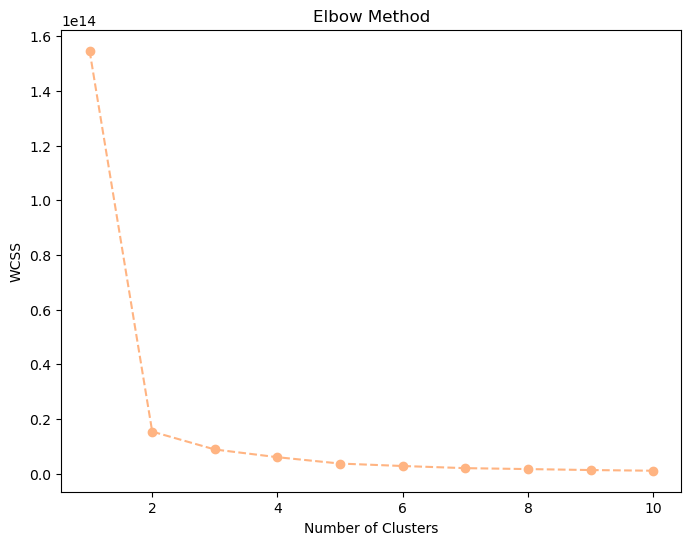

In [306]:
# Assuming 'price' and 'flight_time' will be the columns to use for clustering creation 
X = mergedDf[['price' , 'flight_time']]

# Perform clustering using KMeans and the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Calculate the within-cluster sum of squares

# Plot the elbow method graph
pastel_colors = sns.color_palette("pastel", as_cmap=True)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color=pastel_colors[1])  # Change the color here
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

The value of k will be 2

In [307]:
X = mergedDf[['price', 'flight_time']]

# Perform KMeans clustering with k=2 and explicit n_init setting
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
mergedDf['cluster'] = kmeans.fit_predict(X)

# Displaying the resulting clusters
print(mergedDf['cluster'].value_counts())

# Obtain the centroids of the clusters
print(kmeans.cluster_centers_)

cluster
0    212674
1     87583
Name: count, dtype: int64
[[ 7060.70428867   678.67870056]
 [54451.88080611   865.16744691]]


Cluster counts: For cluster 0 contains 212674 data points, and Cluster 1 contains 87583 data points. Centroids of clusters: For Cluster 0 the centroid in the 'price' dimension is approx. 7060.70 and in the 'flight_time' dimension is 678.68. For Cluster 1 the centroid in the 'price' dimension is approx. 54451.88. and in the 'flight_time' dimension is 865.17.

### Plotting the counts for each cluster 

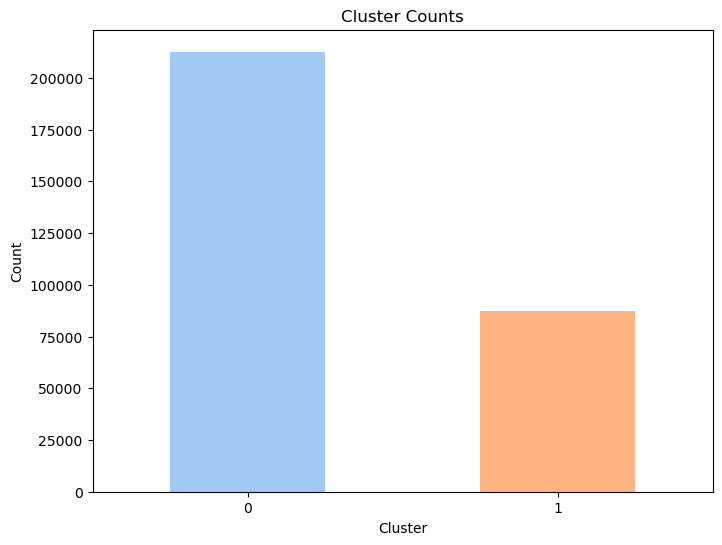

In [308]:
# Using the cluster counts and the 2x2 array 'centroids'
cluster_counts = pd.Series([212674, 87583], index=[0, 1])

pastel_colors = sns.color_palette("pastel", as_cmap=True)

# Plotting the counts for each cluster 
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=pastel_colors)
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.show()

### Clusters based on price and flight time

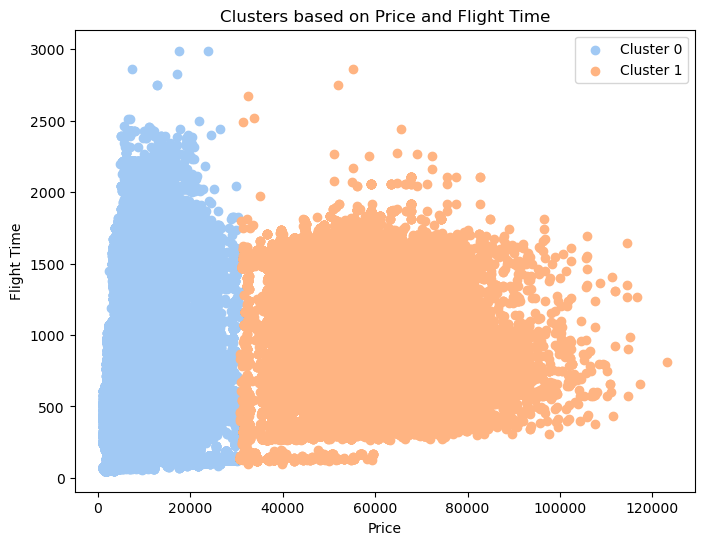

In [309]:
plt.figure(figsize=(8, 6))

for cluster_num, color in zip(mergedDf['cluster'].unique(), pastel_colors):
    cluster_data = mergedDf[mergedDf['cluster'] == cluster_num]
    plt.scatter(cluster_data['price'], cluster_data['flight_time'], c=color, label=f'Cluster {cluster_num}')

plt.title('Clusters based on Price and Flight Time')
plt.xlabel('Price')
plt.ylabel('Flight Time')
plt.legend()
plt.show()

### Calculating the errors

In [310]:
#The centroids of cluster 0 and cluster 1
centroids = np.array([[7060.70428867, 678.67870056], [54451.88080611, 865.16744691]])

# Calculate the differences between each data point and its cluster's centroid
differences = mergedDf[['price', 'flight_time']].values - centroids[mergedDf['cluster'].values]

# Calculate the squared Euclidean distance (error) between each data point and its centroid
squared_errors = np.sum(differences ** 2, axis=1)

# Add columns 'difference_0' and 'difference_1' to mergedDf
mergedDf['difference_0'] = np.sqrt(np.sum((mergedDf[['price', 'flight_time']].values - centroids[0])**2, axis=1))
mergedDf['difference_1'] = np.sqrt(np.sum((mergedDf[['price', 'flight_time']].values - centroids[1])**2, axis=1))

# Calculating percentage error for cluster 0 and cluster 1
mergedDf['error_percentage_0'] = (mergedDf['difference_0'] / mergedDf['price']) * 100
mergedDf['error_percentage_1'] = (mergedDf['difference_1'] / mergedDf['price']) * 100

# Normalizing error columns to a range of 0 to 100
max_error_0 = mergedDf['error_percentage_0'].max()
min_error_0 = mergedDf['error_percentage_0'].min()
max_error_1 = mergedDf['error_percentage_1'].max()
min_error_1 = mergedDf['error_percentage_1'].min()

# Applying min-max normalization to error columns
mergedDf['error_percentage_0'] = ((mergedDf['error_percentage_0'] - min_error_0) / (max_error_0 - min_error_0)) * 100
mergedDf['error_percentage_1'] = ((mergedDf['error_percentage_1'] - min_error_1) / (max_error_1 - min_error_1)) * 100

# Add these errors as a new column in the DataFrame
mergedDf['squared_error'] = squared_errors

# Display the DataFrame with added squared error column and other relevant columns
mergedDf[['price', 'difference_0', 'difference_1', 'error_percentage_0', 'error_percentage_1', 'squared_error']].head()

,price,difference_0,difference_1,error_percentage_0,error_percentage_1,squared_error
0,5953,1236.146070,48504.452482,3.806978,16.872847,1.528057e+06
1,5953,1231.740043,48504.301946,3.793316,16.872794,1.517184e+06
2,5956,1233.458504,48501.452827,3.796718,16.863304,1.521420e+06
3,5955,1232.139807,48502.377183,3.793272,16.866457,1.518169e+06
4,5955,1229.941753,48502.302170,3.786459,16.866431,1.512757e+06


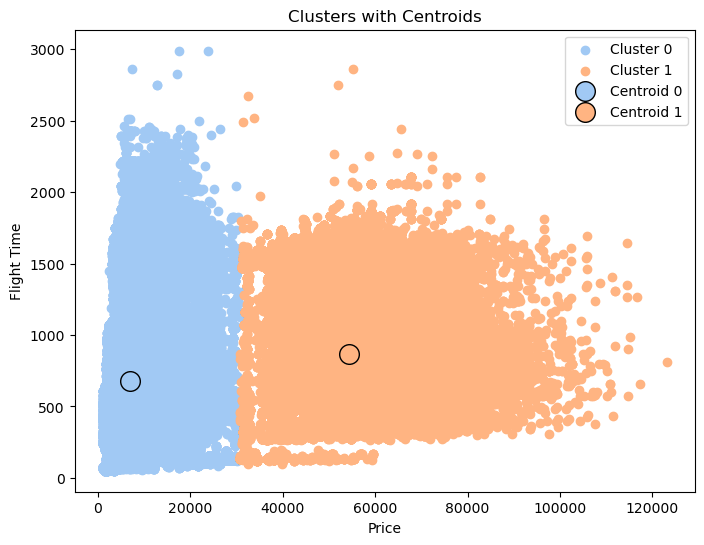

In [311]:
# Define a color palette
pastel_colors = sns.color_palette("pastel")

# Scatter plot of the data points colored by clusters with pastel colors
plt.figure(figsize=(8, 6))
for cluster_num, color in zip(mergedDf['cluster'].unique(), pastel_colors):
    cluster_data = mergedDf[mergedDf['cluster'] == cluster_num]
    plt.scatter(cluster_data['price'], cluster_data['flight_time'], label=f'Cluster {cluster_num}', c=[color])

# Overlay centroids on the plot
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='o', s=200, edgecolor='black', c=[pastel_colors[i]], label=f'Centroid {i}')

plt.title('Clusters with Centroids')
plt.xlabel('Price')
plt.ylabel('Flight Time')
plt.legend()
plt.show()

### Violin plot of Price distribution

C:\Users\juanc\AppData\Local\Temp\ipykernel_8728\3264426413.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y='price', data=data_filtered, palette=pastel_colors)
C:\Users\juanc\AppData\Local\Temp\ipykernel_8728\3264426413.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(x='cluster', y='price', data=data_filtered, palette=pastel_colors)


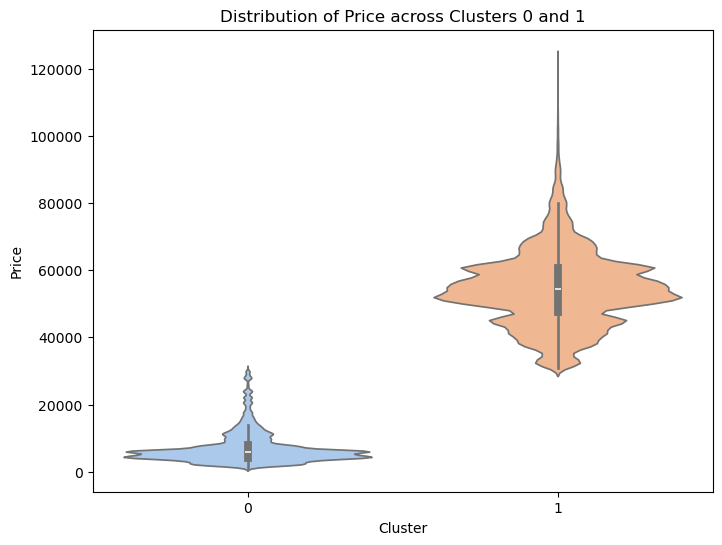

In [312]:
# Filter the DataFrame for clusters 0 and 1
clusters_of_interest = [0, 1]
data_filtered = mergedDf[mergedDf['cluster'].isin(clusters_of_interest)]

# Create a color palette
pastel_colors = sns.color_palette("pastel")

# Create a violin plot to analyze 'price' across clusters 0 and 1 
plt.figure(figsize=(8, 6))
sns.violinplot(x='cluster', y='price', data=data_filtered, palette=pastel_colors)
plt.title('Distribution of Price across Clusters 0 and 1')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

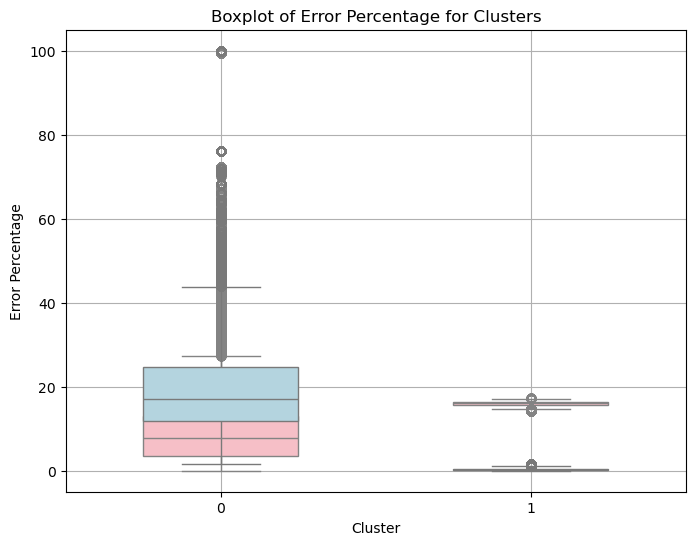

In [313]:
# Define a pastel color palette
pastel_palette = ['#FFB6C1', '#ADD8E6']  

# Set the palette
sns.set_palette(sns.color_palette(pastel_palette))

# boxplot code
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='error_percentage_0', data=mergedDf, width=0.5)
sns.boxplot(x='cluster', y='error_percentage_1', data=mergedDf, width=0.5)
plt.xlabel('Cluster')
plt.ylabel('Error Percentage')
plt.title('Boxplot of Error Percentage for Clusters')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

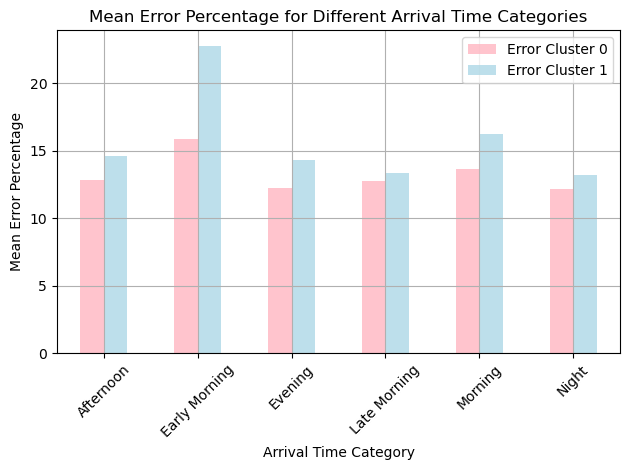

In [314]:
plt.figure(figsize=(10, 6))
error_means = mergedDf.groupby('arr_time_category')[['error_percentage_0', 'error_percentage_1']].mean()
error_means.plot(kind='bar', alpha=0.8)
plt.xlabel('Arrival Time Category')
plt.ylabel('Mean Error Percentage')
plt.title('Mean Error Percentage for Different Arrival Time Categories')
plt.xticks(rotation=45)
plt.legend(['Error Cluster 0', 'Error Cluster 1'])
plt.grid(True)
plt.tight_layout()
plt.show()

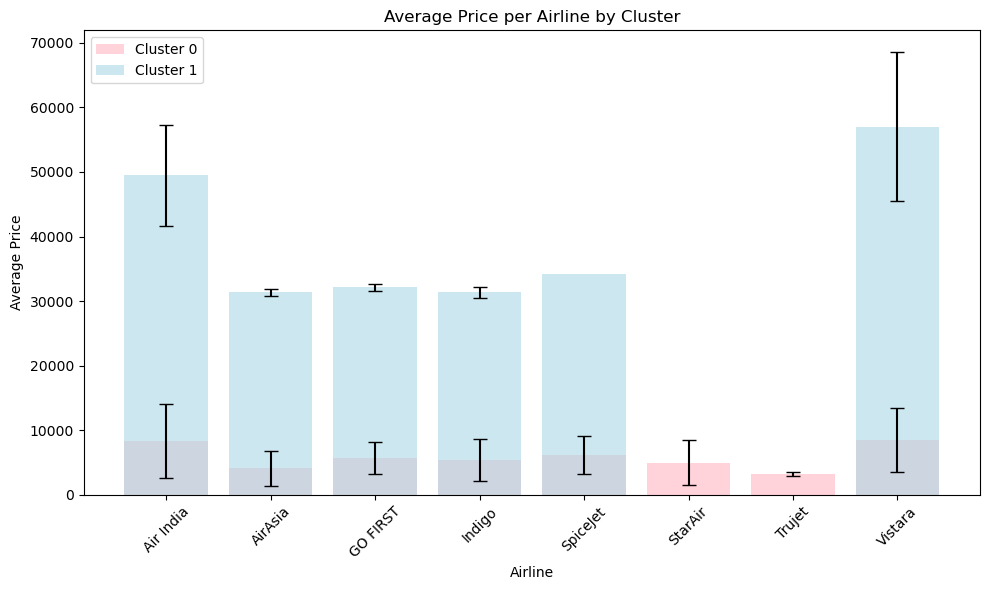

In [315]:
# Grouping by 'airline' and 'cluster' to calculate mean price and standard deviation
grouped = mergedDf.groupby(['airline', 'cluster'])['price'].agg(['mean', 'std']).reset_index()

# Plotting the bar chart with clusters distinguished by colors and error bars
plt.figure(figsize=(10, 6))
for cluster_num in mergedDf['cluster'].unique():
    cluster_data = grouped[grouped['cluster'] == cluster_num]
    plt.bar(cluster_data['airline'], cluster_data['mean'], yerr=cluster_data['std'], capsize=5, alpha=0.6, label=f'Cluster {cluster_num}')

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price per Airline by Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

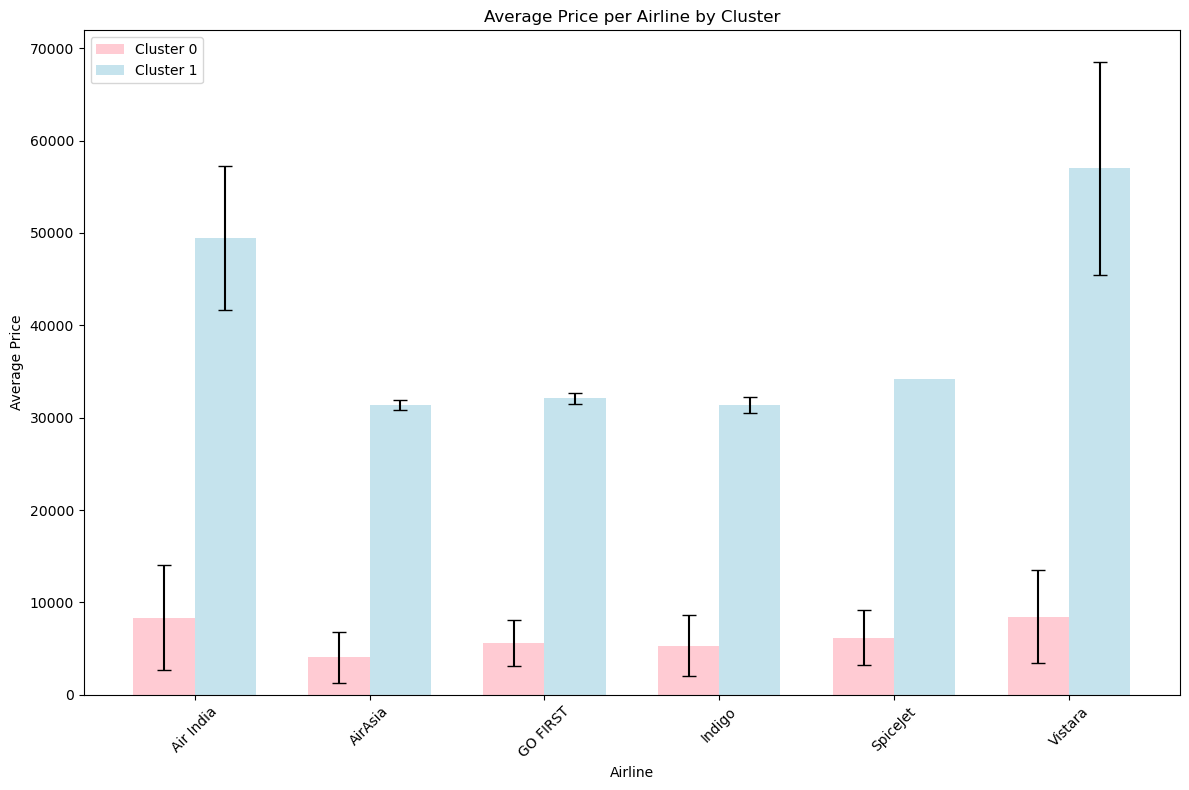

In [316]:
# Grouping by 'airline' and 'cluster' to calculate mean price and standard deviation
grouped = mergedDf.groupby(['airline', 'cluster'])['price'].agg(['mean', 'std']).reset_index()

# Getting unique airlines for each cluster
unique_airlines_0 = grouped[grouped['cluster'] == 0]['airline'].unique()
unique_airlines_1 = grouped[grouped['cluster'] == 1]['airline'].unique()

# Finding common airlines between both clusters
common_airlines = np.intersect1d(unique_airlines_0, unique_airlines_1)

# Filtering data for common airlines
grouped_common = grouped[grouped['airline'].isin(common_airlines)]

# Getting the number of common airlines
num_airlines = len(common_airlines)
bar_width = 0.35  # Width of each bar

# Plotting the grouped bar chart with clusters distinguished by colors and error bars
plt.figure(figsize=(12, 8))
for i, cluster_num in enumerate(mergedDf['cluster'].unique()):
    cluster_data = grouped_common[grouped_common['cluster'] == cluster_num]
    x = np.arange(num_airlines)
    error_bars = cluster_data['std']
    
    plt.bar(x + (bar_width * i), cluster_data['mean'], bar_width, yerr=error_bars, capsize=5, alpha=0.7, label=f'Cluster {cluster_num}')

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price per Airline by Cluster')
plt.xticks(ticks=np.arange(num_airlines) + bar_width / 2, labels=common_airlines, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Clustering by Price, flight time and Airline

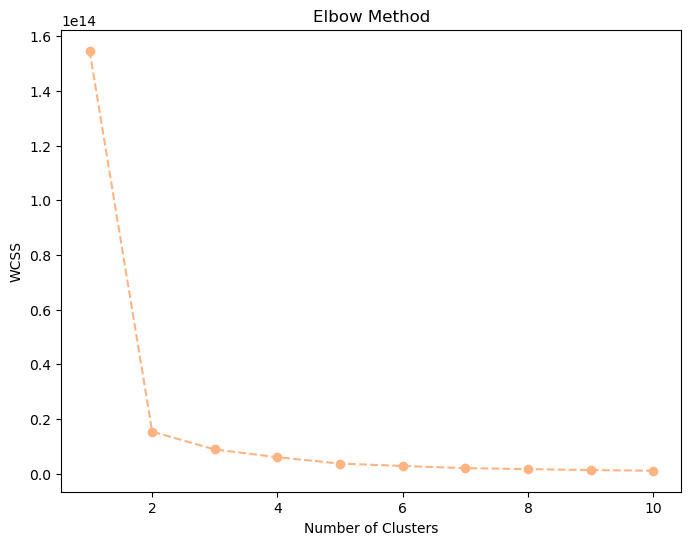

In [317]:
# Assuming 'price' is the column you want to use for clustering
X = mergedDf[['price' , 'flight_time' , 'airline_encoded']]

# Perform clustering using KMeans and the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Calculate the within-cluster sum of squares

# Plot the elbow method graph
pastel_colors = sns.color_palette("pastel", as_cmap=True)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color=pastel_colors[1])  # Change the color here
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [318]:
# Assuming 'price' and 'flight_time' are the columns you want to use for clustering
X = mergedDf[['price', 'flight_time' , 'airline_encoded']]

# Perform KMeans clustering with k=2 and explicit n_init setting
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
mergedDf['cluster'] = kmeans.fit_predict(X)

# Displaying the resulting clusters
print(mergedDf['cluster'].value_counts())

# If you want to see the centroids of the clusters
print(kmeans.cluster_centers_)

cluster
0    212674
1     87583
Name: count, dtype: int64
[[7.06070429e+03 6.78678701e+02 3.38088275e+00]
 [5.44518808e+04 8.65167447e+02 4.61721854e+00]]


Count of airlines per cluster:
cluster
0    212674
1     87583
Name: airline, dtype: int64
Centroids with airline count:
[[  7060.70428867    678.67870056 212674.        ]
 [ 54451.88080611    865.16744691  87583.        ]]


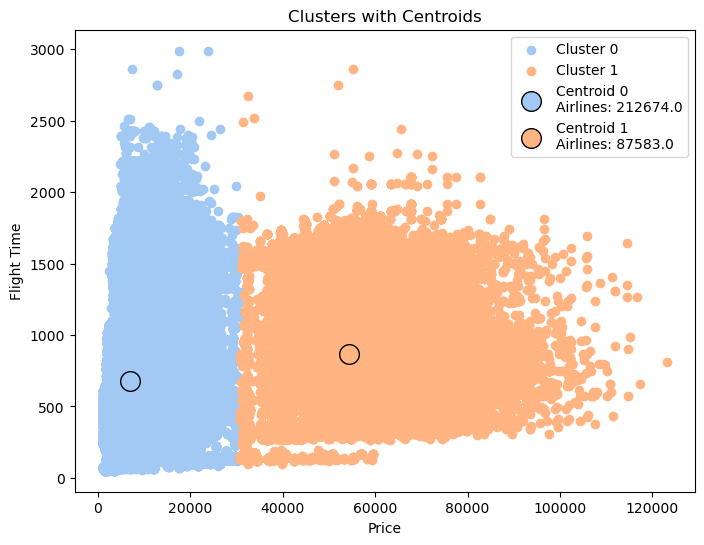

In [319]:
# Grouping by 'cluster' to calculate count of airlines in each cluster
count_per_cluster = mergedDf.groupby('cluster')['airline'].count()

# Displaying the count of airlines per cluster
print("Count of airlines per cluster:")
print(count_per_cluster)

# Displaying centroids along with the airline information
centroids_with_airline = centroids.copy()  # Copy centroids array
centroids_with_airline = np.column_stack((centroids_with_airline, count_per_cluster))  # Add count per cluster to centroids array
print("Centroids with airline count:")
print(centroids_with_airline)

# Define a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Scatter plot of the data points colored by clusters with pastel colors
plt.figure(figsize=(8, 6))
for cluster_num, color in zip(mergedDf['cluster'].unique(), pastel_colors):
    cluster_data = mergedDf[mergedDf['cluster'] == cluster_num]
    plt.scatter(cluster_data['price'], cluster_data['flight_time'], label=f'Cluster {cluster_num}', c=[color])

# Overlay centroids on the plot with airline information
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='o', s=200, edgecolor='black', c=[pastel_colors[i]], label=f'Centroid {i}\nAirlines: {centroids_with_airline[i][2]}')

plt.title('Clusters with Centroids')
plt.xlabel('Price')
plt.ylabel('Flight Time')
plt.legend()
plt.show()

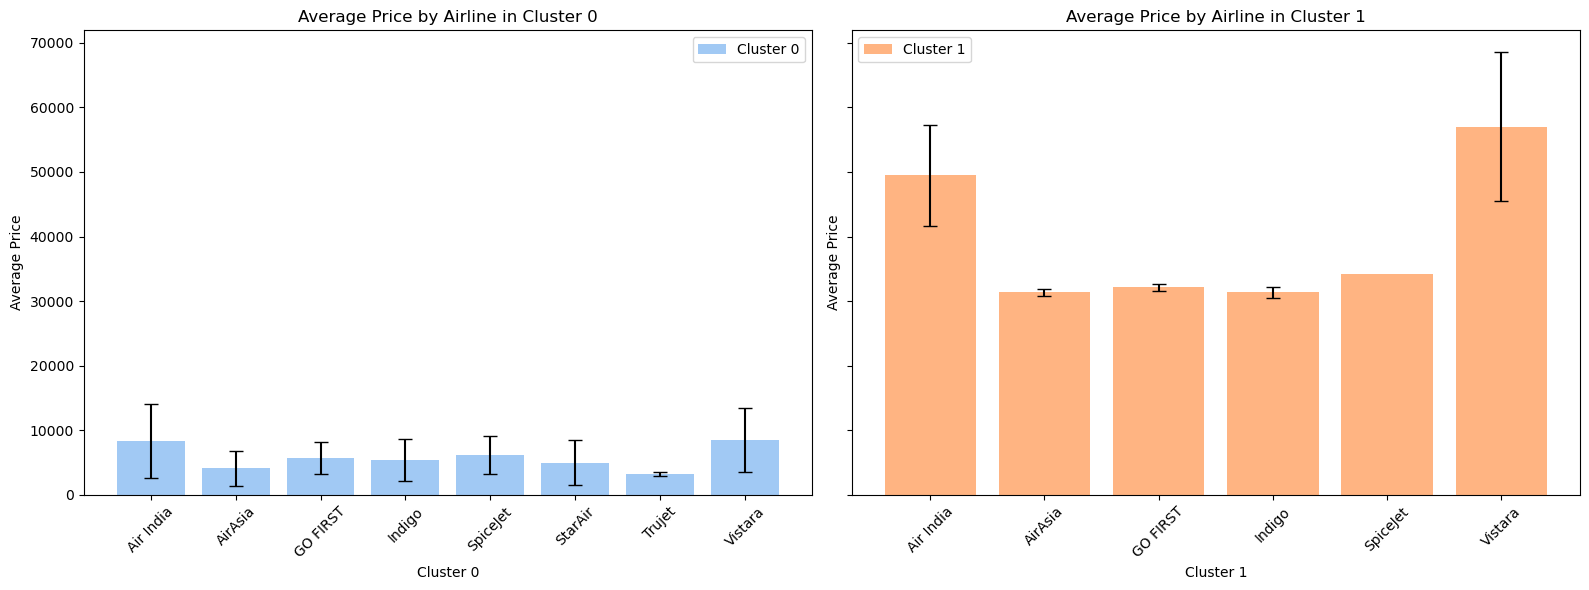

In [320]:
# Grouping by 'airline' and 'cluster' to calculate mean price and standard deviation
average_price_by_airline = mergedDf.groupby(['airline', 'cluster'])['price'].agg(['mean', 'std']).reset_index()

# Define a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Creating subplots for each cluster
clusters = mergedDf['cluster'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(1, num_clusters, figsize=(16, 6), sharey=True)

for i, cluster_num in enumerate(clusters):
    cluster_data = average_price_by_airline[average_price_by_airline['cluster'] == cluster_num]
    ax = axes[i]
    
    ax.bar(cluster_data['airline'], cluster_data['mean'], yerr=cluster_data['std'], capsize=5, color=pastel_colors[i])
    ax.set_xlabel(f'Cluster {cluster_num}')
    ax.set_ylabel('Average Price')
    ax.set_title(f'Average Price by Airline in Cluster {cluster_num}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([f'Cluster {cluster_num}'])

plt.tight_layout()
plt.show()

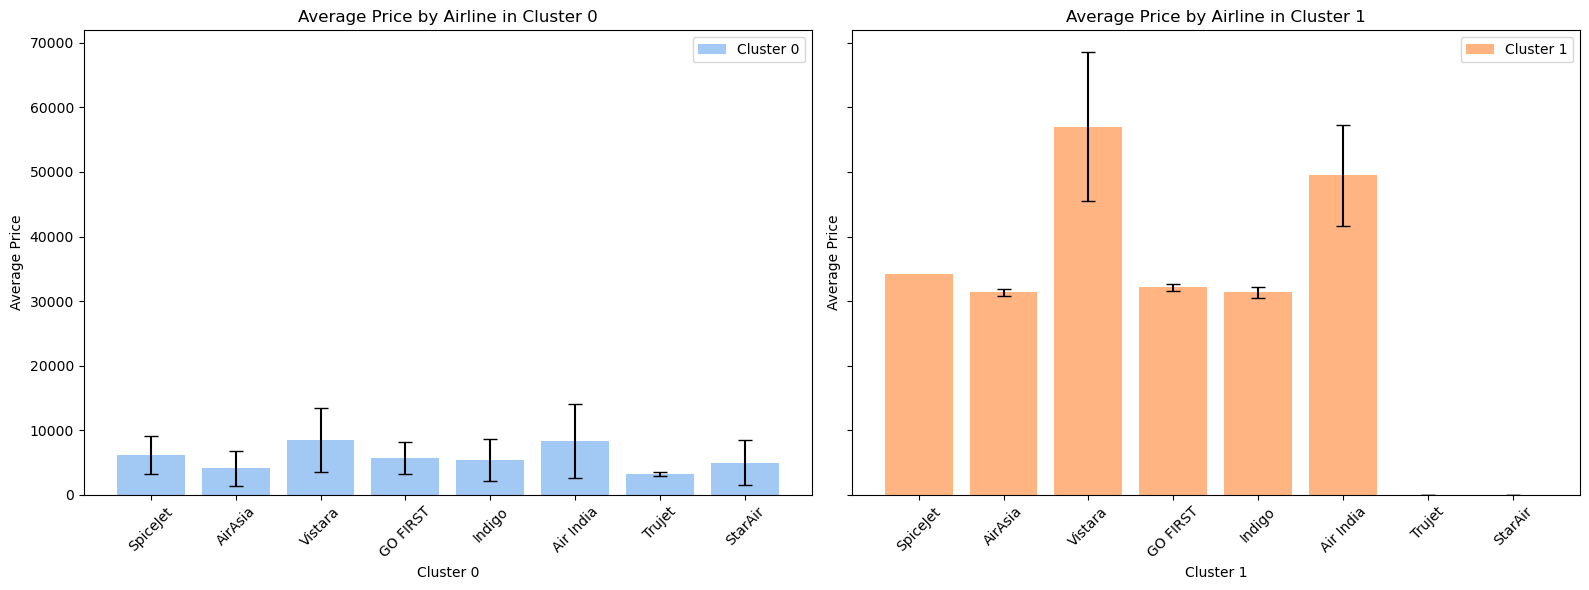

In [321]:
# Get all unique airlines across clusters
all_airlines = mergedDf['airline'].unique()

# Creating subplots for each cluster
clusters = mergedDf['cluster'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(1, num_clusters, figsize=(16, 6), sharey=True)

for i, cluster_num in enumerate(clusters):
    ax = axes[i]
    
    # Create empty lists to store mean prices and std deviations
    means = []
    stds = []
    
    # Iterate through all airlines to ensure all are plotted
    for airline in all_airlines:
        # Filter data for each airline in the specific cluster
        airline_data = average_price_by_airline[(average_price_by_airline['cluster'] == cluster_num) & 
                                                (average_price_by_airline['airline'] == airline)]
        
        # Check if data exists for the airline in this cluster
        if not airline_data.empty:
            mean_price = airline_data['mean'].values[0]
            std_price = airline_data['std'].values[0]
        else:
            # If no data available for the airline in this cluster, set mean and std as 0
            mean_price = 0
            std_price = 0
        
        means.append(mean_price)
        stds.append(std_price)
    
    # Plot all airlines, even if some have no data in this cluster
    ax.bar(all_airlines, means, yerr=stds, capsize=5, color=pastel_colors[i])
    ax.set_xlabel(f'Cluster {cluster_num}')
    ax.set_ylabel('Average Price')
    ax.set_title(f'Average Price by Airline in Cluster {cluster_num}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([f'Cluster {cluster_num}'])

plt.tight_layout()
plt.show()

### Clustering with all columns: Continuous and categorical encoded

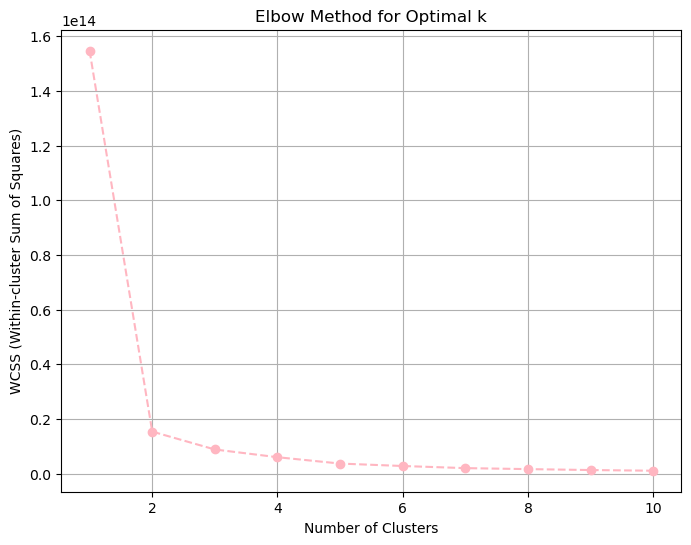

In [322]:
# Selecting columns for clustering analysis
selected_columns = ['airline_encoded', 'from_encoded', 'stop_encoded', 'price', 'flight_class_encoded', 'days_left', 'flight_time', 'dep_hours', 'arr_hours']
X = mergedDf[selected_columns]

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [323]:
optimal_num_clusters = 2 # Add the selected optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add the cluster labels to your DataFrame
mergedDf['cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.38088275e+00 2.58517376e+00 3.70025908e-01 7.06070429e+03
  9.71976283e-01 2.61359479e+01 6.78678701e+02 1.32986446e+01
  1.55224856e+01]
 [4.61721854e+00 2.55838091e+00 7.62502855e-02 5.44518808e+04
  6.05160996e-04 2.56856702e+01 8.65167447e+02 1.37624258e+01
  1.62353201e+01]]


### Clustering conclusion:
    1- In all the clustering analysis we performed, our dataset clearly is defined by 2 clusters
    2- Cluster 0 represents less price data points and cluster 1 high price data points
    3- StarAir and Trujet airline dont contain data points of cluster 1
    4- When there are 1 or 2 stops in the flight the datapoints are most likely to be cluster 1
    5- In the flight class, economy represents cluster 0 and business cluster 1
    6- In cluster 0 the % of error decrease when the price ticket become more expensive 
    7- In cluster 1 the % of error is higher than cluster 0 and also mantain constant when price ticket become more expensive
    8- The squared error is higher in cluster 1 than cluster 0